In [294]:
import numpy as np

# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np
# import pandas as pd
# import seaborn as sns  
# import geopandas as gpd
# import scipy.stats as stats
# import matplotlib.pyplot as plt
# import statsmodels.api as sm
# from factor_analyzer import FactorAnalyzer
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.stats.diagnostic import het_breuschpagan
# from statsmodels.stats.diagnostic import het_white
# from statsmodels.stats.diagnostic import het_goldfeldquandt
# from statsmodels.stats.diagnostic import het_arch
from src import *

In [295]:
survey = pd.read_excel('../data/raw/NARIG_Survey.xlsx', usecols='A:EG')
column_names = pd.read_json('../data/processed/json/column_names.json', typ='series')

kenya = gpd.read_file('../data/processed/geojson/kenya.geojson')
counties = gpd.read_file('../data/processed/geojson/kenya_counties.geojson')
sub_counties = gpd.read_file('../data/processed/geojson/kenya_sub_counties.geojson')
wards = gpd.read_file('../data/processed/geojson/kenya_wards.geojson')
narig_wards = gpd.read_file('../data/processed/geojson/narig_wards.geojson')
kenya.crs = counties.crs = sub_counties.crs = wards.crs = narig_wards.crs = 'EPSG:4326'
makueni_county = counties[counties['county'] == 'Makueni']
makueni_sub_counties = sub_counties[sub_counties['county'] == 'Makueni']
makueni_wards = wards[wards['county'] == 'Makueni']

survey.rename(columns=column_names, inplace=True)
survey.replace(replace_map, inplace=True)
survey.replace(ordinal_map, inplace=True)

survey = makueni_wards.merge(survey, on='ward', how='right')

survey['age'] = survey['age'].replace(0, np.nan)
survey['gender'] = survey['gender'].str.split().str[-1]

orig_col_order = list(survey.columns)

# fig, ax = plt.subplots(1, 2, figsize=(30, 15))
# sns.heatmap(survey.set_index('value_chain').sort_index().isnull(), cbar=False, ax=ax[0])

demographic_cols = survey.columns[:12].tolist()
attitude_cols = survey.columns[12:20].tolist()
knowledge_cols = survey.columns[20:25].tolist()
practice_cols = survey.columns[25:30].tolist()
# vc_performance_cols = survey.columns[30:-6].tolist()
performance_cols = survey.columns[-6:].tolist()

value_chains = list(survey['value_chain'].unique())

narig_dfs = {vc: survey[survey['value_chain'] == vc].dropna(axis=1, how='all') for vc in value_chains}

for k, v in narig_dfs.items():
    v.columns = v.columns.str.replace('_\d', '', regex=True)
    v.dropna(axis=0, inplace=True)  
    # v = create_composite_feature(v, attitude_cols, 'farmer_attitudes')
    # v = create_composite_feature(v, knowledge_cols, 'farmer_knowledge')
    # v = create_composite_feature(v, practice_cols, 'farmer_practices')
    # v = create_composite_feature(v, performance_cols, 'project_performance')
    # v = engineer_change_features(v)

narig_dfs['survey_df'] = pd.concat(narig_dfs.values(), ignore_index=True)
narig_dfs['survey_df'] = narig_dfs['survey_df'][[col for col in orig_col_order if col in narig_dfs['survey_df'].columns]]

narig_dfs['survey_df'].replace(reverse_map, inplace=True)
numeric_cols = narig_dfs['survey_df'].select_dtypes('number').columns.tolist()
narig_dfs['survey_df'].replace(ordinal_map, inplace=True)

# narig_dfs['survey_df'] = create_change_features(narig_dfs['survey_df'], drop_before_after=False)
# narig_dfs['survey_df'] = create_composite_feature(narig_dfs['survey_df'], attitude_cols, 'farmer_attitudes', drop_features=False)
# narig_dfs['survey_df'] = create_composite_feature(narig_dfs['survey_df'], knowledge_cols, 'farmer_knowledge', drop_features=False)
# narig_dfs['survey_df'] = create_composite_feature(narig_dfs['survey_df'], practice_cols, 'farmer_practices', drop_features=False)
narig_dfs['survey_df'] = create_composite_feature(narig_dfs['survey_df'], performance_cols, 'project_performance', drop_features=False)

for k, v in narig_dfs.items():
    for col in v.select_dtypes('object').columns:
        v[col] = v[col].astype('category')
    for col in v.select_dtypes('float').columns:
        if v[col].apply(float.is_integer).all():
            v[col] = v[col].astype(int)
    print(k)

# sns.heatmap(narig_dfs['survey_df'].set_index('value_chain').sort_index().isnull(), cbar=False, ax=ax[1])
# plt.show()
palette = sns.color_palette('Spectral', 6)
palette.reverse()

Tomato
Mango
Green gram
Indigenous chicken
survey_df


In [296]:
narig_dfs['survey_df']

,county,sub_county,ward,geometry,gender,age,education,monthly_income,household_size,family_head,...,adopted_vaccination,trained_hygiene_management,adopted_hygiene_management,enterprise_profitability_increase,farm_productivity_increase,timely_implementation,new_income_streams,job_creation_increase,project_inclusivity,project_performance
0,Makueni,Mbooni,Tulimani,"POLYGON ((37.38407 -1.52204, 37.38428 -1.52226...",Male,64,Secondary,30000,3,Yes,...,NaN,NaN,NaN,0.881749,1.003392,-0.653221,1.082994,1.070872,0.969843,-1.830068
1,Makueni,Mbooni,Tulimani,"POLYGON ((37.38407 -1.52204, 37.38428 -1.52226...",Male,67,Secondary,20000,4,Yes,...,NaN,NaN,NaN,0.881749,1.003392,1.125877,1.082994,1.070872,0.969843,-2.502048
2,Makueni,Mbooni,Tulimani,"POLYGON ((37.38407 -1.52204, 37.38428 -1.52226...",Female,33,Primary,5000,3,No,...,NaN,NaN,NaN,0.881749,1.003392,1.125877,1.082994,1.070872,0.969843,-2.502048
3,Makueni,Mbooni,Tulimani,"POLYGON ((37.38407 -1.52204, 37.38428 -1.52226...",Female,73,Primary,800,6+,No,...,NaN,NaN,NaN,0.881749,1.003392,-0.653221,1.082994,1.070872,0.969843,-1.830068
4,Makueni,Mbooni,Tulimani,"POLYGON ((37.38407 -1.52204, 37.38428 -1.52226...",Male,71,Secondary,10000,5,Yes,...,NaN,NaN,NaN,0.881749,1.003392,1.125877,1.082994,1.070872,0.969843,-2.502048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,Makueni,Kibwezi East,Mtito Andei,"POLYGON ((38.23390 -2.53316, 38.23548 -2.53385...",Female,85,Primary,16000,6+,No,...,Yes,Yes,Yes,-0.806171,-0.677290,-0.653221,-0.740137,-0.797577,-0.815307,1.831304
331,Makueni,Kibwezi East,Mtito Andei,"POLYGON ((38.23390 -2.53316, 38.23548 -2.53385...",Female,54,Primary,14000,6+,Yes,...,Yes,Yes,Yes,-0.806171,-0.677290,-0.653221,-0.740137,-0.797577,-0.815307,1.831304
332,Makueni,Kibwezi East,Mtito Andei,"POLYGON ((38.23390 -2.53316, 38.23548 -2.53385...",Female,60,Primary,16000,6+,Yes,...,Yes,Yes,Yes,-0.806171,-0.677290,-0.653221,-0.740137,-0.797577,-0.815307,1.831304
333,Makueni,Kibwezi East,Mtito Andei,"POLYGON ((38.23390 -2.53316, 38.23548 -2.53385...",Female,62,Primary,4500,5,No,...,Yes,Yes,Yes,0.881749,1.003392,1.125877,1.082994,1.070872,0.969843,-2.502048


In [297]:
# # perform factor analysis (KMO)
# fa = FactorAnalyzer(n_factors=25, rotation='varimax')
# fa.fit(narig_dfs['survey_df'][performance_cols])
# kmo, kmo_model = fa.get_kmo()
# print(f'KMO: {kmo}')
# 
# # create scree plot using matplotlib
# plt.figure(figsize=(6.7, 4))
# 
# plt.scatter(range(1, narig_dfs['survey_df'][performance_cols].shape[1]+1), ev)
# plt.plot(range(1, narig_dfs['survey_df'][performance_cols].shape[1]+1), ev)
# plt.title('Scree Plot')
# plt.xlabel('Factors')
# plt.ylabel('Eigenvalue')
# plt.grid()
# plt.show()


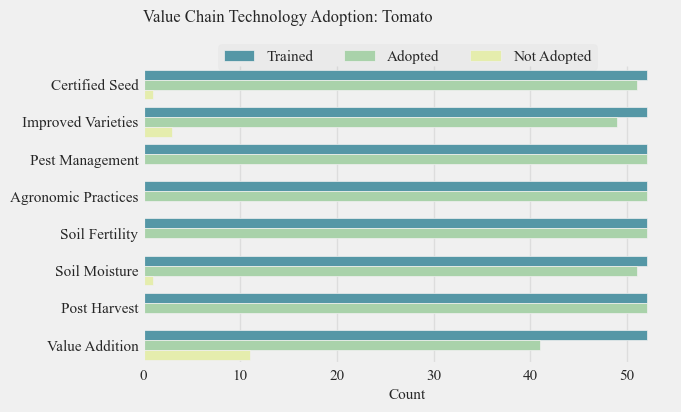

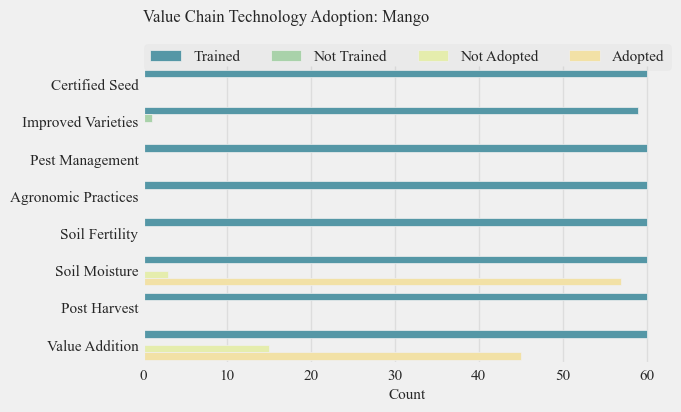

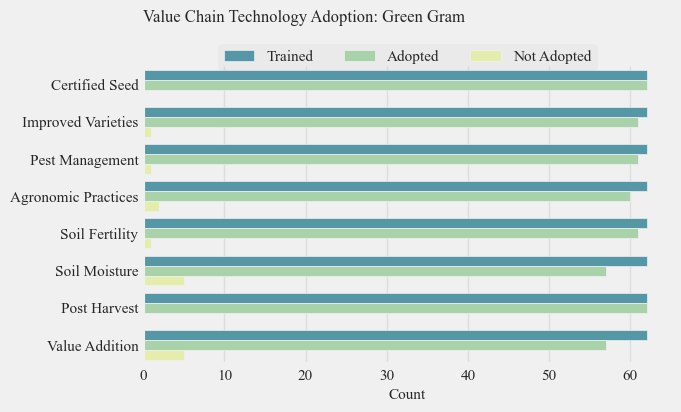

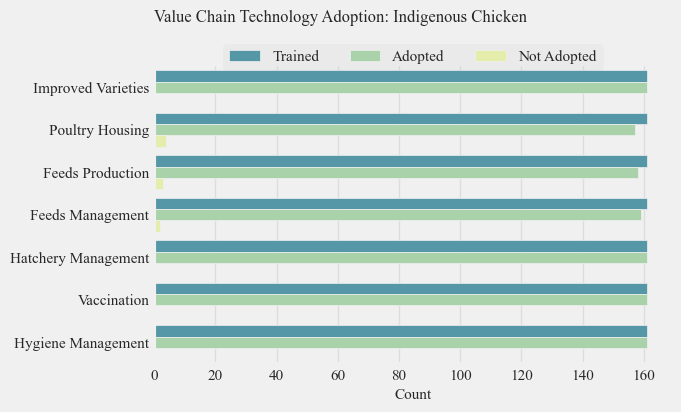

In [298]:
tmt = narig_dfs['Tomato']
mng = narig_dfs['Mango']
gg = narig_dfs['Green gram']
ic = narig_dfs['Indigenous chicken']

tm = create_technology_features(tmt)
mn = create_technology_features(mng)
gg = create_technology_features(gg)
ic = create_technology_features(ic)

# technology_cols = [col for col in tmt.columns if col.startswith('trained') or col.startswith('adopted')]
# 
# for i, col in enumerate(tmt.columns):
#     if col in technology_cols:
#         technology_col = col.split('_', 1)[1]
#         trained_col = 'trained_' + technology_col
#         adopted_col = 'adopted_' + technology_col
# 
#         if col in technology_cols:
#             tmt.loc[:, trained_col] = tmt[trained_col].replace({'Yes': 'Trained', 'No': 'Not Trained'})
#             tmt.loc[:, adopted_col] = tmt[adopted_col].replace({'Yes': 'Adopted', 'No': 'Not Adopted'})
#             
# tmt = tmt.melt(id_vars=[col for col in tmt.columns if col not in technology_cols],
#                value_vars=technology_cols, var_name='Technology', value_name='Status')
# 
# tmt.loc[:, 'Technology'] = tmt['Technology'].apply(lambda x: x.split('_', 1)[1].replace('_', ' ').title())
# 

# 

plt.figure(figsize=(6.7, 4))
sns.countplot(data=tm, y='Technology', hue='Status', palette=palette[:tm.Status.nunique()])
plt.title('Value Chain Technology Adoption: Tomato', y=1.12, loc='left')
plt.xlabel('Count')
plt.ylabel('')
plt.legend(loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.1),
           facecolor='gray', framealpha=0.05)
sns.despine()
plt.show()

plt.figure(figsize=(6.7, 4))
sns.countplot(data=mn, y='Technology', hue='Status', palette=palette[:mn.Status.nunique()])
plt.title('Value Chain Technology Adoption: Mango', y=1.12, loc='left')
plt.xlabel('Count')
plt.ylabel('')
plt.legend(loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.1),
           facecolor='gray', framealpha=0.05)
sns.despine()
plt.show()

plt.figure(figsize=(6.7, 4))
sns.countplot(data=gg, y='Technology', hue='Status', palette=palette[:gg.Status.nunique()])
plt.title('Value Chain Technology Adoption: Green Gram', y=1.12, loc='left')
plt.xlabel('Count')
plt.ylabel('')    
plt.legend(loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.1),
           facecolor='gray', framealpha=0.05)
sns.despine()
plt.show()

plt.figure(figsize=(6.7, 4))
sns.countplot(data=ic, y='Technology', hue='Status', palette=palette[:ic.Status.nunique()])
plt.title('Value Chain Technology Adoption: Indigenous Chicken', y=1.12, loc='left')
plt.xlabel('Count')
plt.ylabel('')
plt.legend(loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.1),
           facecolor='gray', framealpha=0.05)
sns.despine()
plt.show()

In [299]:
trained_adopted_totals = pd.DataFrame({'Trained': [tm[tm['Status'] == 'Trained'].shape[0],
                                                   mn[mn['Status'] == 'Trained'].shape[0],
                                                   gg[gg['Status'] == 'Trained'].shape[0],
                                                   ic[ic['Status'] == 'Trained'].shape[0]],
                                       'Not Trained': [tm[tm['Status'] == 'Not Trained'].shape[0],
                                                       mn[mn['Status'] == 'Not Trained'].shape[0],
                                                       gg[gg['Status'] == 'Not Trained'].shape[0],
                                                       ic[ic['Status'] == 'Not Trained'].shape[0]],
                                       'Adopted': [tm[tm['Status'] == 'Adopted'].shape[0],
                                                   mn[mn['Status'] == 'Adopted'].shape[0],
                                                   gg[gg['Status'] == 'Adopted'].shape[0],
                                                   ic[ic['Status'] == 'Adopted'].shape[0]],
                                       'Not Adopted': [tm[tm['Status'] == 'Not Adopted'].shape[0],
                                                       mn[mn['Status'] == 'Not Adopted'].shape[0],
                                                       gg[gg['Status'] == 'Not Adopted'].shape[0],
                                                       ic[ic['Status'] == 'Not Adopted'].shape[0]]},
                                      index=['Tomato', 'Mango', 'Green Gram', 'Indigenous Chicken'])

trained_adopted_totals['Total'] = trained_adopted_totals.sum(axis=1)
trained_adopted_totals.loc['Total'] = trained_adopted_totals.sum(axis=0)
# trained_adopted_totals['Percentage'] = trained_adopted_totals['Total'] / trained_adopted_totals['Total'].sum() * 100
# trained_adopted_totals['Percentage'] = trained_adopted_totals['Percentage'].round(2)
# trained_adopted_totals['Percentage'] = trained_adopted_totals['Percentage'].astype(str) + '%'

display(trained_adopted_totals)

,Trained,Not Trained,Adopted,Not Adopted,Total
Tomato,416,0,400,16,832
Mango,479,1,102,18,600
Green Gram,496,0,481,15,992
Indigenous Chicken,1127,0,1118,9,2254
Total,2518,1,2101,58,4678


,Ward,Sample,Returned,Percentage
0,Mtito Andei,119,122,102.52%
1,Thange,113,77,68.14%
2,Waia/Kako,99,77,77.78%
3,Tulimani,63,59,93.65%
4,Total,394,335,85.03%


,Ward,Type,Count
0,Mtito Andei,Sample,119
1,Thange,Sample,113
2,Waia/Kako,Sample,99
3,Tulimani,Sample,63
4,Mtito Andei,Returned,122
5,Thange,Returned,77
6,Waia/Kako,Returned,77
7,Tulimani,Returned,59


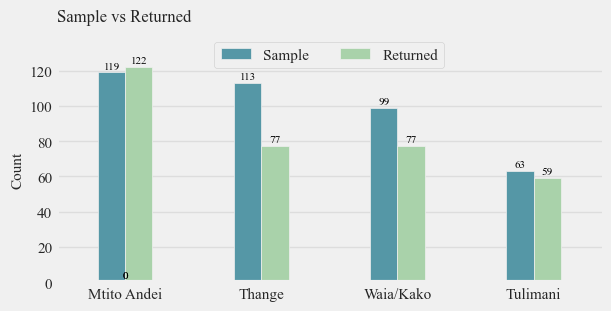

In [300]:
# Value count ward
ward_counts = pd.DataFrame({'Ward': ['Mtito Andei', 'Thange', 'Waia/Kako', 'Tulimani'],
                            'Sample': [119, 113, 99, 63]})
ward_counts['Returned'] = narig_dfs['survey_df'].ward.value_counts().values
ward_counts.set_index('Ward', inplace=True)
ward_counts.loc['Total'] = ward_counts.sum()

ward_counts['Percentage'] = ward_counts['Returned'] / ward_counts['Sample'] * 100
ward_counts['Percentage'] = ward_counts['Percentage'].round(2)
ward_counts['Percentage'] = ward_counts['Percentage'].astype(str) + '%'
# Add total row

ward_counts.reset_index(inplace=True)
display(ward_counts)

# Melt the dataframe
ward_counts_melted = pd.melt(ward_counts.drop(4, axis=0), id_vars='Ward', value_vars=['Sample', 'Returned'], var_name='Type', value_name='Count')
display(ward_counts_melted)

# Bar chart comparing Sample vs Returned (staggered)
fig, ax = plt.subplots(figsize=(6, 3))

sns.barplot(data=ward_counts_melted, x='Ward', y='Count', hue='Type', palette=palette[:2], width=0.4, ax=ax)

for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')
    
ax.set_title('Sample vs Returned', y=1.12, loc='left')
ax.set_xlabel('')
ax.set_ylabel('Count')
# ax.set_ylabel('')
ax.legend(loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.1))
sns.despine()
plt.show()

,count,mean,std,min,25%,50%,75%,max
age,335.0,52.244776,13.656602,22.0,42.0,53.0,63.0,85.0


C:\Users\Admin\AppData\Local\Temp\ipykernel_22836\1638453361.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=90)
C:\Users\Admin\AppData\Local\Temp\ipykernel_22836\1638453361.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=90)


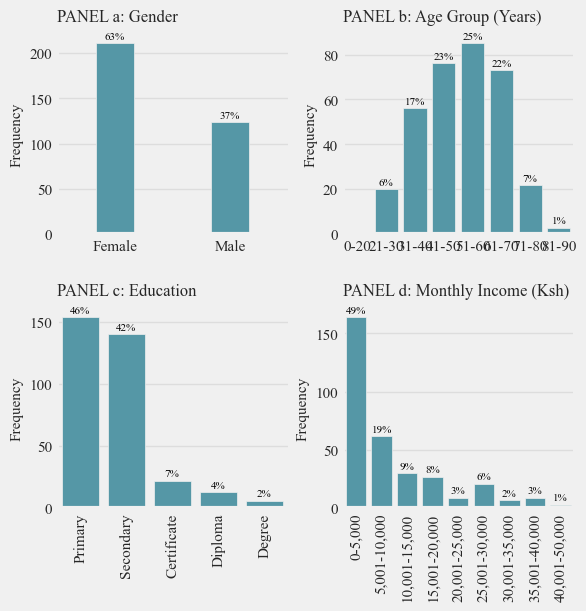

C:\Users\Admin\AppData\Local\Temp\ipykernel_22836\1638453361.py:88: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=90)


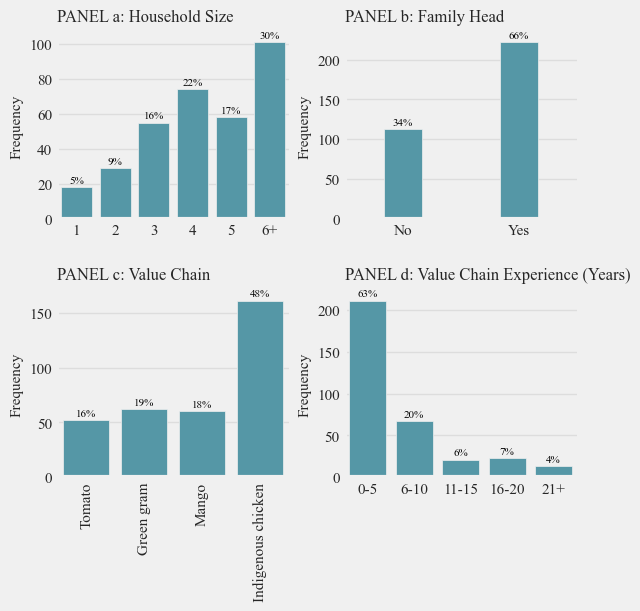

In [301]:
display(narig_dfs['survey_df'][['age']].describe().T)

# Create a new age column with the age groups
narig_dfs['survey_df']['age_group'] = pd.cut(narig_dfs['survey_df']['age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90'])

# Create a new income column with the income groups
narig_dfs['survey_df']['income_group'] = pd.cut(narig_dfs['survey_df']['monthly_income'], bins=[0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 50000], labels=['0-5,000', '5,001-10,000', '10,001-15,000', '15,001-20,000', '20,001-25,000', '25,001-30,000', '30,001-35,000', '35,001-40,000', '40,001-50,000'])

# Create a new vc_experience column with the vc_experience groups
narig_dfs['survey_df']['vc_experience_binned'] = pd.cut(narig_dfs['survey_df']['vc_experience'], bins=[0, 5, 10, 15, 20, np.inf], labels=['0-5', '6-10', '11-15', '16-20', '21+'])

# Plot age groups
fig, ax = plt.subplots(2, 2, figsize=(5.75, 6), gridspec_kw={'hspace': 0.1})

sns.countplot(data=narig_dfs['survey_df'], x='gender', width=0.33, ax=ax[0,0], color=palette[0])
sns.countplot(data=narig_dfs['survey_df'], x='age_group', ax=ax[0,1], color=palette[0])
sns.countplot(data=narig_dfs['survey_df'], x='education',
              order=['Primary', 'Secondary', 'Certificate', 'Diploma', 'Degree'], ax=ax[1,0], color=palette[0])
sns.countplot(data=narig_dfs['survey_df'], x='income_group', ax=ax[1,1], color=palette[0])

# Annotate the plots with percentages
for i in range(2):
    for j in range(2):
        for p in ax[i,j].patches:
            ax[i,j].annotate(f"{p.get_height() / narig_dfs['survey_df'].shape[0] * 100:.0f}%", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')
            
ax[0,0].set_title('PANEL a: Gender', y=1.02, loc='left')
ax[0,1].set_title('PANEL b: Age Group (Years)', y=1.02, loc='left')
ax[1,0].set_title('PANEL c: Education', y=1.02, loc='left')
ax[1,1].set_title('PANEL d: Monthly Income (Ksh)', y=1.02, loc='left')

ax[0,0].set_xlabel('')
ax[0,1].set_xlabel('')
ax[1,0].set_xlabel('')
ax[1,1].set_xlabel('')
ax[0,0].set_ylabel('Frequency')
ax[0,1].set_ylabel('Frequency')
ax[1,0].set_ylabel('Frequency')
ax[1,1].set_ylabel('Frequency')

# ax[0].set_title('Gender', y=1.02, loc='left')
# ax[1].set_title('Age Group', y=1.02, loc='left')
# ax[2].set_title('Education', y=1.02, loc='left')
# 
# ax[0].set_xlabel('')
# ax[1].set_xlabel('')
# ax[2].set_xlabel('')
# 
# ax[0].set_ylabel('Count')
# ax[1].set_ylabel('')
# ax[2].set_ylabel('')

ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=90)
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=90)

sns.despine()
plt.show()

fig, ax = plt.subplots(2, 2, figsize=(5.75, 6), gridspec_kw={'hspace': 0.1})

sns.countplot(data=narig_dfs['survey_df'], x='household_size', ax=ax[0,0], color=palette[0])
sns.countplot(data=narig_dfs['survey_df'], x='family_head', width=0.33, ax=ax[0,1], color=palette[0])
sns.countplot(data=narig_dfs['survey_df'], x='value_chain',
              order=['Tomato', 'Green gram', 'Mango', 'Indigenous chicken'], ax=ax[1,0], color=palette[0])
sns.countplot(data=narig_dfs['survey_df'], x='vc_experience_binned', ax=ax[1,1], color=palette[0])

# Annotate the plots with percentages
for i in range(2):
    for j in range(2):
        for p in ax[i,j].patches:
            ax[i,j].annotate(f"{p.get_height() / narig_dfs['survey_df'].shape[0] * 100:.0f}%", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')
            
ax[0,0].set_title('PANEL a: Household Size', y=1.02, loc='left')
ax[0,1].set_title('PANEL b: Family Head', y=1.02, loc='left')
ax[1,0].set_title('PANEL c: Value Chain', y=1.02, loc='left')
ax[1,1].set_title('PANEL d: Value Chain Experience (Years)', y=1.02, loc='left')

ax[0,0].set_xlabel('')
ax[0,1].set_xlabel('')
ax[1,0].set_xlabel('')
ax[1,1].set_xlabel('')
ax[0,0].set_ylabel('Frequency')
ax[0,1].set_ylabel('Frequency')
ax[1,0].set_ylabel('Frequency')
ax[1,1].set_ylabel('Frequency')

            
ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=90)

sns.despine()
plt.show()

In [302]:
df = narig_dfs['survey_df']

# df.columns = df.columns.str.replace('_', ' ').str.capitalize()

farmer_demographics = df[demographic_cols].rename(columns={col: col.replace('_', ' ').capitalize() for col in demographic_cols})
farmer_attitudes = df[attitude_cols].rename(columns={col: col.replace('_', ' ').capitalize() for col in attitude_cols}).replace(reverse_map)
farmer_knowledge = df[knowledge_cols].rename(columns={col: col.replace('_', ' ').capitalize() for col in knowledge_cols}).replace(reverse_map)
farmer_practices = df[practice_cols].rename(columns={col: col.replace('_', ' ').capitalize() for col in practice_cols}).replace(reverse_map)
performance = df[performance_cols].rename(columns={col: col.replace('_', ' ').capitalize() for col in performance_cols})

# farmer_attitudes.replace(reverse_map, inplace=True)
# farmer_knowledge.replace(reverse_map, inplace=True)
# farmer_practices.replace(reverse_map, inplace=True)

# display(farmer_attitudes)

display(farmer_attitudes[farmer_attitudes.columns[0]].value_counts(normalize=True))
display(farmer_knowledge[farmer_knowledge.columns[0]].value_counts(normalize=True))
display(farmer_practices[farmer_practices.columns[0]].value_counts(normalize=True))

# Melt the data to have 'Statement' and 'Response' columns
farmer_attitudes_melted = pd.melt(farmer_attitudes, var_name='Statement', value_name='Response', ignore_index=False)
# # farmer_attitudes_melted['Response'] = farmer_attitudes_melted['Response'].astype('category')
farmer_knowledge_melted = pd.melt(farmer_knowledge, var_name='Statement', value_name='Response', ignore_index=False)
# # farmer_knowledge_melted['Response'] = farmer_knowledge_melted['Response'].astype('category')
farmer_practices_melted = pd.melt(farmer_practices, var_name='Statement', value_name='Response', ignore_index=False)
# # farmer_practices_melted['Response'] = farmer_practices_melted['Response'].astype('category')

# Pivot the data to have 'Statement' as the index and 'Response' as the columns
farmer_attitudes_pivoted = farmer_attitudes_melted.pivot_table(index='Statement', columns='Response', aggfunc='size', fill_value=0)
farmer_knowledge_pivoted = farmer_knowledge_melted.pivot_table(index='Statement', columns='Response', aggfunc='size', fill_value=0)
farmer_practices_pivoted = farmer_practices_melted.pivot_table(index='Statement', columns='Response', aggfunc='size', fill_value=0)

# farmer_attitudes_pivoted = farmer_attitudes_pivoted.div(farmer_attitudes_pivoted.sum(axis=1), axis=0) * 100
# columns = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']
# # Ensure all columns are present; if not, add them and fill with 0
# farmer_attitudes_pivoted = farmer_attitudes_pivoted.reindex(columns=columns, fill_value=0)
# farmer_attitudes_pivoted = farmer_attitudes_pivoted.round(2)

farmer_attitudes_pivoted = calculate_percentages(farmer_attitudes_pivoted)
farmer_knowledge_pivoted = calculate_percentages(farmer_knowledge_pivoted)
farmer_practices_pivoted = calculate_percentages(farmer_practices_pivoted)

display(farmer_attitudes_pivoted)

display(farmer_attitudes_melted[farmer_attitudes_melted['Statement'] == 'Project skepticism'].Response.value_counts(normalize=True))
display(farmer_knowledge_melted[farmer_knowledge_melted['Statement'] == 'Project understanding'].Response.value_counts(normalize=True))
display(farmer_practices_melted[farmer_practices_melted['Statement'] == 'Practice mixed farming'].Response.value_counts(normalize=True))

# Loop over each index and replace 'Vc'with 'VC'
for df in [farmer_attitudes_pivoted, farmer_knowledge_pivoted, farmer_practices_pivoted]:
    df.index = df.index.str.replace('Vc', 'VC')
    
farmer_knowledge_pivoted

Project skepticism
Strongly Agree    0.519403
Agree             0.328358
Neutral           0.104478
Disagree          0.047761
Name: proportion, dtype: float64

Project understanding
Strongly Agree    0.516418
Agree             0.462687
Neutral           0.014925
Disagree          0.005970
Name: proportion, dtype: float64

Practice mixed farming
Agree                0.537313
Strongly Agree       0.453731
Neutral              0.002985
Strongly Disagree    0.002985
Disagree             0.002985
Name: proportion, dtype: float64

Response,Strongly Disagree,Disagree,Neutral,Agree,Strongly Agree
Statement,,,,,
Adequate consultation,0,0.00,0.60,52.24,47.16
Project acceptance,0,0.00,1.19,58.51,40.30
Project benefits,0,0.00,0.00,43.88,56.12
Project skepticism,0,4.78,10.45,32.84,51.94
Project success optimism,0,0.00,0.30,52.54,47.16
Satisfactory training,0,0.00,0.30,49.85,49.85
Sustainable skills,0,0.00,2.69,51.94,45.37
Sustainable technology,0,0.00,6.57,49.55,43.88


Response
Strongly Agree    0.519403
Agree             0.328358
Neutral           0.104478
Disagree          0.047761
Name: proportion, dtype: float64

Response
Strongly Agree    0.516418
Agree             0.462687
Neutral           0.014925
Disagree          0.005970
Name: proportion, dtype: float64

Response
Agree                0.537313
Strongly Agree       0.453731
Neutral              0.002985
Strongly Disagree    0.002985
Disagree             0.002985
Name: proportion, dtype: float64

Response,Strongly Disagree,Disagree,Neutral,Agree,Strongly Agree
Statement,,,,,
Project understanding,0,0.6,1.49,46.27,51.64
VC agriculture practices awareness,0,0.0,0.30,51.94,47.76
VC product marketing understanding,0,0.3,0.60,54.33,44.78
VC technology awareness,0,0.9,5.37,49.25,44.48
VC understanding,0,0.0,0.00,52.84,47.16


In [303]:
# fig, ax = plt.subplots()
# 
# palette = sns.color_palette('Spectral', 5)
# palette.reverse()
# 
# ax.barh(farmer_attitudes_pivoted.index, farmer_attitudes_pivoted['Strongly Disagree'], color=palette[4], label='Strongly Disagree')
# ax.barh(farmer_attitudes_pivoted.index, farmer_attitudes_pivoted['Disagree'], left=farmer_attitudes_pivoted['Strongly Disagree'], color=palette[3], label='Disagree')
# ax.barh(farmer_attitudes_pivoted.index, farmer_attitudes_pivoted['Neutral'], left=farmer_attitudes_pivoted['Strongly Disagree'] + farmer_attitudes_pivoted['Disagree'], color=palette[2], label='Neutral')
# ax.barh(farmer_attitudes_pivoted.index, farmer_attitudes_pivoted['Agree'], left=farmer_attitudes_pivoted['Strongly Disagree'] + farmer_attitudes_pivoted['Disagree'] + farmer_attitudes_pivoted['Neutral'], color=palette[1], label='Agree')
# ax.barh(farmer_attitudes_pivoted.index, farmer_attitudes_pivoted['Strongly Agree'], left=farmer_attitudes_pivoted['Strongly Disagree'] + farmer_attitudes_pivoted['Disagree'] + farmer_attitudes_pivoted['Neutral'] + farmer_attitudes_pivoted['Agree'], color=palette[0], label='Strongly Agree')
    
    
# bar_plot(farmer_attitudes_pivoted, ax, palette=palette)
# 
# 
# # ax.bar(years, men, color='b', label='Men')
# # ax.bar(years, women, bottom=men, color='orange', label='Women')
# ax.set_xlabel('Relative Proportion (%)')
# # ax.set_xlabel('Year')
# # ax.set_xticks(years)
# ax.set_xticks(np.arange(0, 101, 25))
# ax.legend(loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.275),
#           facecolor='gray', framealpha=0.05)
# 
# plt.show()

C:\Users\Admin\DataspellProjects\narigp-farmer-impact-study\src\helpers.py:370: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(v + df['Strongly Disagree'][i] + 0.5, i - 0.1, f"{v:.1f}%", color='black', fontsize=6)
C:\Users\Admin\DataspellProjects\narigp-farmer-impact-study\src\helpers.py:374: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(v + df['Strongly Disagree'][i] + df['Disagree'][i] + 0.5, i - 0.1, f"{v:.1f}%", color='black', fontsize=6)
C:\Users\Admin\DataspellProjects\narigp-farmer-impact-study\src\helpers.py:378: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a f

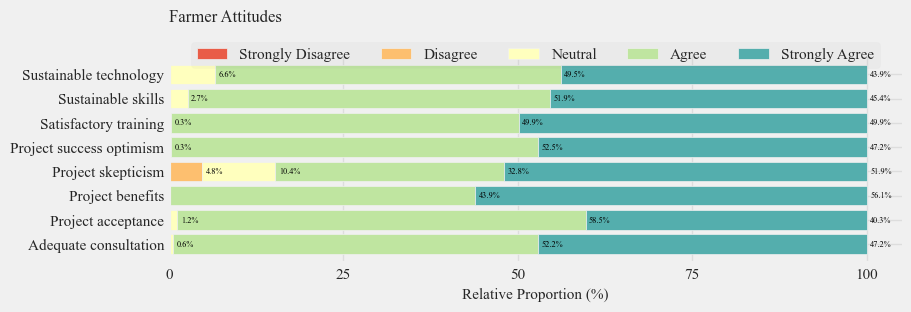

C:\Users\Admin\DataspellProjects\narigp-farmer-impact-study\src\helpers.py:370: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(v + df['Strongly Disagree'][i] + 0.5, i - 0.1, f"{v:.1f}%", color='black', fontsize=6)
C:\Users\Admin\DataspellProjects\narigp-farmer-impact-study\src\helpers.py:374: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(v + df['Strongly Disagree'][i] + df['Disagree'][i] + 0.5, i - 0.1, f"{v:.1f}%", color='black', fontsize=6)
C:\Users\Admin\DataspellProjects\narigp-farmer-impact-study\src\helpers.py:378: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a f

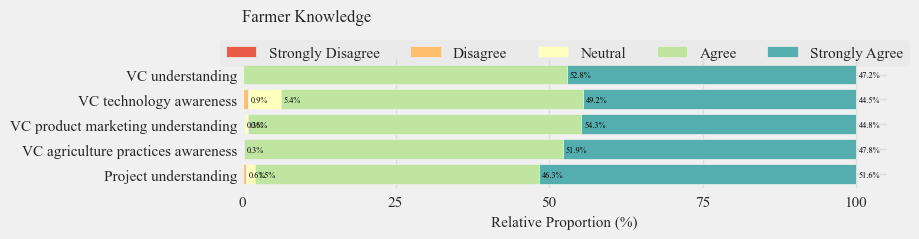

C:\Users\Admin\DataspellProjects\narigp-farmer-impact-study\src\helpers.py:370: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(v + df['Strongly Disagree'][i] + 0.5, i - 0.1, f"{v:.1f}%", color='black', fontsize=6)
C:\Users\Admin\DataspellProjects\narigp-farmer-impact-study\src\helpers.py:374: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(v + df['Strongly Disagree'][i] + df['Disagree'][i] + 0.5, i - 0.1, f"{v:.1f}%", color='black', fontsize=6)
C:\Users\Admin\DataspellProjects\narigp-farmer-impact-study\src\helpers.py:378: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a f

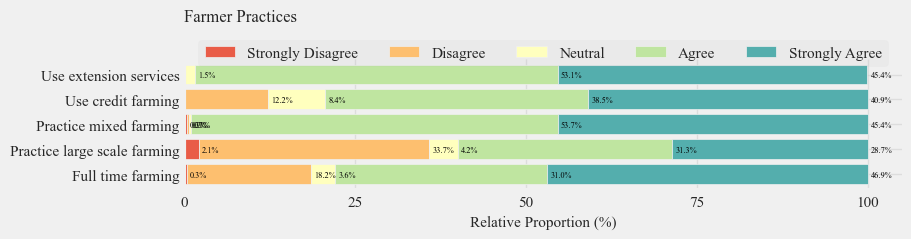

In [304]:
fig, ax = plt.subplots(figsize=(9, 3))

ax = bar_plot(farmer_attitudes_pivoted, ax)

ax.set_title('Farmer Attitudes', y=1.12, loc='left')
ax.set_xlabel('Relative Proportion (%)')
ax.set_ylabel('')
ax.set_xticks(np.arange(0, 101, 25))
ax.set_xticklabels(np.arange(0, 101, 25))
ax.set_xlim(0, 105)
ax.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.1),
          facecolor='gray', framealpha=0.05)

sns.despine()
plt.show()

fig, ax = plt.subplots(figsize=(9, 2.25))

ax = bar_plot(farmer_knowledge_pivoted, ax)

ax.set_title('Farmer Knowledge', y=1.22, loc='left')
ax.set_xlabel('Relative Proportion (%)')
ax.set_ylabel('')
ax.set_xticks(np.arange(0, 101, 25))
ax.set_xticklabels(np.arange(0, 101, 25))
ax.set_xlim(0, 105)
ax.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.2),
          facecolor='gray', framealpha=0.05)

sns.despine()
plt.show()

fig, ax = plt.subplots(figsize=(9, 2.25))

ax = bar_plot(farmer_practices_pivoted, ax)

ax.set_title('Farmer Practices', y=1.22, loc='left')
ax.set_xlabel('Relative Proportion (%)')
ax.set_ylabel('')
ax.set_xticks(np.arange(0, 101, 25))
ax.set_xticklabels(np.arange(0, 101, 25))
ax.set_xlim(0, 105)
ax.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.2),
          facecolor='gray', framealpha=0.05)

sns.despine()
plt.show()

C:\Users\Admin\DataspellProjects\narigp-farmer-impact-study\src\helpers.py:370: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(v + df['Strongly Disagree'][i] + 0.5, i - 0.1, f"{v:.1f}%", color='black', fontsize=6)
C:\Users\Admin\DataspellProjects\narigp-farmer-impact-study\src\helpers.py:374: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(v + df['Strongly Disagree'][i] + df['Disagree'][i] + 0.5, i - 0.1, f"{v:.1f}%", color='black', fontsize=6)
C:\Users\Admin\DataspellProjects\narigp-farmer-impact-study\src\helpers.py:378: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a f

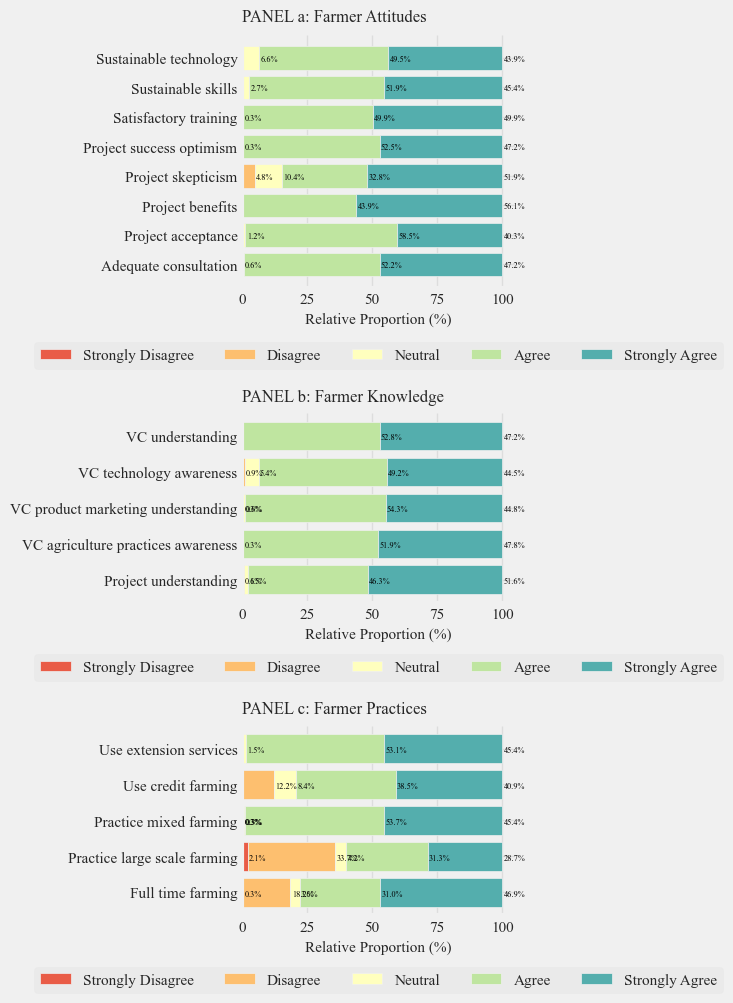

In [305]:
fig, ax = plt.subplots(3, 1, figsize=(6.7, 9.8), gridspec_kw={'hspace': 0.1, 'height_ratios': [4, 3, 3]})

ax[0] = bar_plot(farmer_attitudes_pivoted, ax[0])
ax[1] = bar_plot(farmer_knowledge_pivoted, ax[1])
ax[2] = bar_plot(farmer_practices_pivoted, ax[2])

ax[0].set_title('PANEL a: Farmer Attitudes', y=1.02, loc='left')
ax[1].set_title('PANEL b: Farmer Knowledge', y=1.02, loc='left')
ax[2].set_title('PANEL c: Farmer Practices', y=1.02, loc='left')

ax[0].set_xlabel('Relative Proportion (%)')
ax[1].set_xlabel('Relative Proportion (%)')
ax[2].set_xlabel('Relative Proportion (%)')
ax[0].set_ylabel('')
ax[1].set_ylabel('')
ax[2].set_ylabel('')

ax[0].set_xticks(np.arange(0, 101, 25)) 
ax[1].set_xticks(np.arange(0, 101, 25))
ax[2].set_xticks(np.arange(0, 101, 25))

ax[0].set_xticklabels(np.arange(0, 101, 25))
ax[1].set_xticklabels(np.arange(0, 101, 25))
ax[2].set_xticklabels(np.arange(0, 101, 25))

ax[0].legend(loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.35),
             facecolor='gray', framealpha=0.05)
ax[1].legend(loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.45),
                facecolor='gray', framealpha=0.05)
ax[2].legend(loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.45),
                facecolor='gray', framealpha=0.05)



ax[0].set_xlim(0, 105)
ax[1].set_xlim(0, 105)
ax[2].set_xlim(0, 105)

sns.despine()

plt.show()

In [306]:
farmer_demographics = farmer_demographics.rename(columns={col: col.replace(' ', '_').lower() for col in farmer_demographics.columns})
farmer_attitudes = farmer_attitudes.rename(columns={col: col.replace(' ', '_').lower() for col in farmer_attitudes.columns})
farmer_knowledge = farmer_knowledge.rename(columns={col: col.replace(' ', '_').lower() for col in farmer_knowledge.columns})
farmer_practices = farmer_practices.rename(columns={col: col.replace(' ', '_').lower() for col in farmer_practices.columns})
performance = performance.rename(columns={col: col.replace(' ', '_').lower() for col in performance.columns})

# display(performance)

performance = create_composite_feature(performance, performance.columns.tolist(), 'performance_index', weights=None, drop_features=False, ordinal_map=None)

# display(performance)

farmer_demographics = pd.concat([farmer_demographics, performance['performance_index']], axis=1)
farmer_attitudes = pd.concat([farmer_attitudes, performance['performance_index']], axis=1)
farmer_knowledge = pd.concat([farmer_knowledge, performance['performance_index']], axis=1)
farmer_practices = pd.concat([farmer_practices, performance['performance_index']], axis=1)

# Set all object columns to category
for df in [farmer_demographics, farmer_attitudes, farmer_knowledge, farmer_practices]:
    for col in df.select_dtypes('object').columns:
        df[col] = df[col].astype('category')

In [307]:
# for col in farmer_demographics.select_dtypes('category').columns:
#     unique_values = farmer_demographics[col].unique()
# 
#     # Perform t-test if there are two unique values
#     if len(unique_values) == 2:
#         group1 = farmer_demographics[farmer_demographics[col] == unique_values[0]]['project_performance']
#         group2 = farmer_demographics[farmer_demographics[col] == unique_values[1]]['project_performance']
#         t_stat, p_value = ttest_ind(group1, group2, equal_var=False)
#         print(f"T-Test for {col}: p-value = {p_value:.4f}")
# 
#     # Perform ANOVA if there are more than two unique values
#     elif len(unique_values) > 2:
#         model = pg.anova(data=farmer_demographics, dv='project_performance', between=col)
#         if model['p-unc'][0] < 0.05:
#             print(f"ANOVA for {col}: p-value = {model['p-unc'][0]:.4f}")
# 
#             # Perform pairwise t-tests if ANOVA is significant
#             posthoc = pg.pairwise_tests(data=farmer_demographics, dv='project_performance', between=col)
#             if all(posthoc['p-unc'] < 0.05):
#                 print(f"Pairwise T-Tests for {col}: All comparisons are significant")
#             else:
#                 print(f"Pairwise T-Tests for {col}: Not all comparisons are significant")
#                 display(posthoc, posthoc[posthoc['p-unc'] < 0.05])

                # Perform pairwise t-tests if ANOVA is significant
                # posthoc = pg.pairwise_tests(data=df, dv=column, between=col)
                # if all(posthoc['p-unc'] < 0.05):
                #     print(f"Pairwise T-Tests for {col}: All comparisons are significant")
                # else:
                #     print(f"Pairwise T-Tests for {col}: Not all comparisons are significant")
                #     # display(posthoc)
                #     display(posthoc[posthoc['p-unc'] < 0.05])
                    
conduct_hypothesis_test(farmer_demographics, 'performance_index')

T-Test for sub_county
---------------------
H0: The means of the two groups are equal.
H1: The means of the two groups are not equal.

t-statistic (333) = -7.1061
p-value = 0.0000

Reject H0. The means of the two groups are not equal.

ANOVA for ward
--------------
H0: The means of the groups are equal.
H1: The means of the groups are not equal.

F-statistic (3, 331) = 82.0316
p-value = 0.0000

Reject H0: The means of the groups are not equal.

T-Test for gender
-----------------
H0: The means of the two groups are equal.
H1: The means of the two groups are not equal.

t-statistic (333) = -1.5710
p-value = 0.1171

Fail to reject H0. The means of the two groups are equal.

ANOVA for education
-------------------
H0: The means of the groups are equal.
H1: The means of the groups are not equal.

F-statistic (4, 330) = 1.4450
p-value = 0.2188

Fail to reject H0: The means of the groups are equal.

ANOVA for household_size
------------------------
H0: The means of the groups are equal.
H1: 

In [308]:
# conduct_hypothesis_test(farmer_attitudes, 'performance_index') 

In [309]:
# conduct_hypothesis_test(farmer_knowledge, 'performance_index')

In [310]:
# conduct_hypothesis_test(farmer_practices, 'performance_index')

In [311]:
farmer_attitudes = create_composite_feature(farmer_attitudes, farmer_attitudes.columns.tolist(), 'farmer_attitudes_index')
farmer_knowledge = create_composite_feature(farmer_knowledge, farmer_knowledge.columns.tolist(), 'farmer_knowledge_index')
farmer_practices = create_composite_feature(farmer_practices, farmer_practices.columns.tolist(), 'farmer_practices_index')

for df in [farmer_attitudes, farmer_knowledge, farmer_practices]:
    for col in df.select_dtypes('category').columns:
        df[col] = df[col].astype('int64')

farmer_demographics = farmer_demographics[['performance_index'] + farmer_demographics.columns.tolist()[:-1]]
farmer_attitudes = farmer_attitudes[['performance_index', 'farmer_attitudes_index'] + farmer_attitudes.columns.tolist()[:-2]]
farmer_knowledge = farmer_knowledge[['performance_index', 'farmer_knowledge_index'] + farmer_knowledge.columns.tolist()[:-2]]
farmer_practices = farmer_practices[['performance_index', 'farmer_practices_index'] + farmer_practices.columns.tolist()[:-2]]

In [312]:
farmer_demographics

,performance_index,county,sub_county,ward,geometry,gender,age,education,monthly_income,household_size,family_head,value_chain,vc_experience
0,-1.830068,Makueni,Mbooni,Tulimani,"POLYGON ((37.38407 -1.52204, 37.38428 -1.52226...",Male,64,Secondary,30000,3,Yes,Tomato,40
1,-2.502048,Makueni,Mbooni,Tulimani,"POLYGON ((37.38407 -1.52204, 37.38428 -1.52226...",Male,67,Secondary,20000,4,Yes,Tomato,20
2,-2.502048,Makueni,Mbooni,Tulimani,"POLYGON ((37.38407 -1.52204, 37.38428 -1.52226...",Female,33,Primary,5000,3,No,Tomato,5
3,-1.830068,Makueni,Mbooni,Tulimani,"POLYGON ((37.38407 -1.52204, 37.38428 -1.52226...",Female,73,Primary,800,6+,No,Tomato,2
4,-2.502048,Makueni,Mbooni,Tulimani,"POLYGON ((37.38407 -1.52204, 37.38428 -1.52226...",Male,71,Secondary,10000,5,Yes,Tomato,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,1.831304,Makueni,Kibwezi East,Mtito Andei,"POLYGON ((38.23390 -2.53316, 38.23548 -2.53385...",Female,85,Primary,16000,6+,No,Indigenous chicken,18
331,1.831304,Makueni,Kibwezi East,Mtito Andei,"POLYGON ((38.23390 -2.53316, 38.23548 -2.53385...",Female,54,Primary,14000,6+,Yes,Indigenous chicken,15
332,1.831304,Makueni,Kibwezi East,Mtito Andei,"POLYGON ((38.23390 -2.53316, 38.23548 -2.53385...",Female,60,Primary,16000,6+,Yes,Indigenous chicken,20
333,-2.502048,Makueni,Kibwezi East,Mtito Andei,"POLYGON ((38.23390 -2.53316, 38.23548 -2.53385...",Female,62,Primary,4500,5,No,Indigenous chicken,6


In [313]:
farmer_demg = pd.concat([farmer_demographics.select_dtypes('number'), farmer_demographics[['ward', 'value_chain']]], axis=1)
farmer_demg = pd.get_dummies(farmer_demg, columns=['ward', 'value_chain'], drop_first=False)

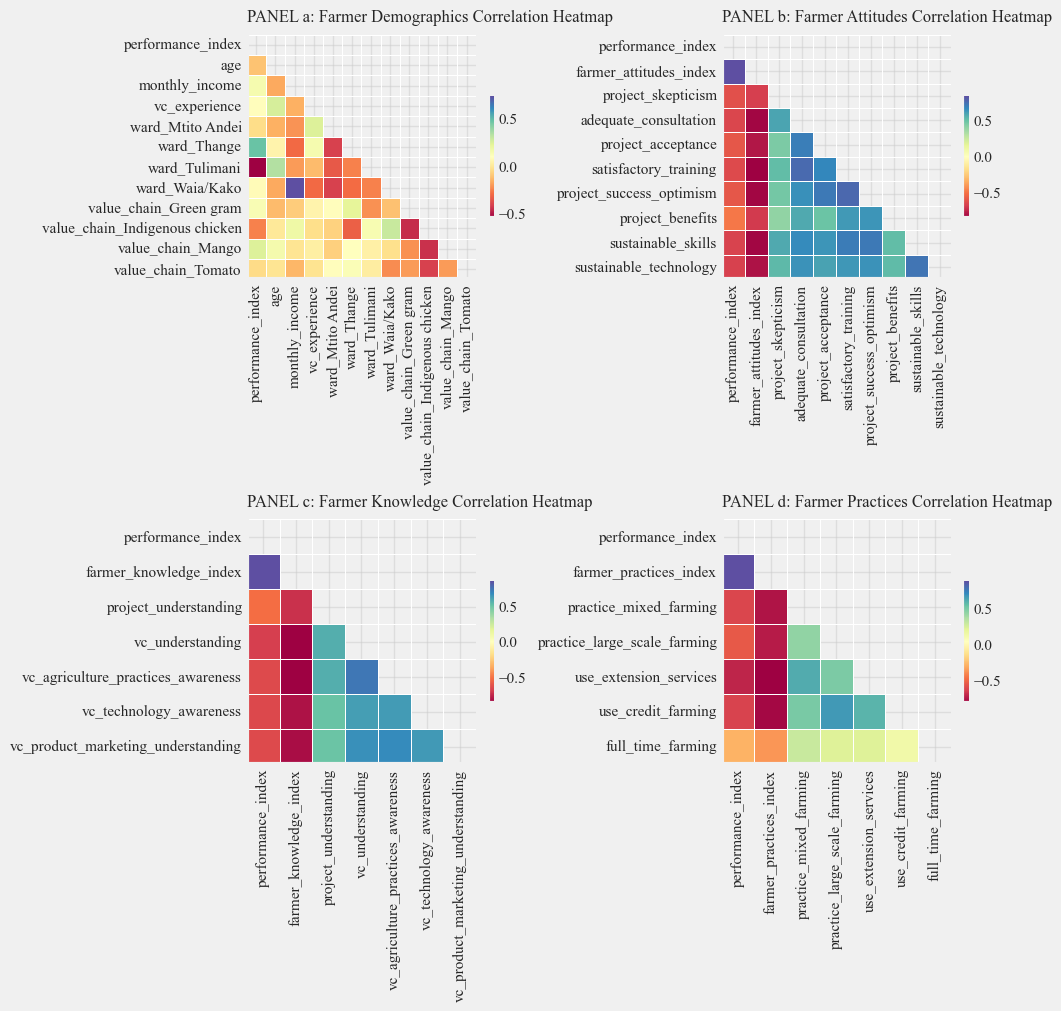

In [314]:
demg_corr = farmer_demg.corr()
demg_mask = np.triu(np.ones_like(demg_corr, dtype=bool))
att_corr = farmer_attitudes.select_dtypes('number').corr()
att_mask = np.triu(np.ones_like(att_corr, dtype=bool))
know_corr = farmer_knowledge.select_dtypes('number').corr()
know_mask = np.triu(np.ones_like(know_corr, dtype=bool))
prac_corr = farmer_practices.select_dtypes('number').corr()
prac_mask = np.triu(np.ones_like(prac_corr, dtype=bool))

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# ADD
sns.heatmap(demg_corr, mask=demg_mask, cmap='Spectral', cbar=True, linewidths=0.5, cbar_kws={"shrink": 0.5}, annot=False, fmt='.2f', ax=ax[0,0])
sns.heatmap(att_corr, mask=att_mask, cmap='Spectral', cbar=True, linewidths=0.5, cbar_kws={"shrink": 0.5}, annot=False, fmt='.2f', ax=ax[0,1])
sns.heatmap(know_corr, mask=know_mask, cmap='Spectral', cbar=True, linewidths=0.5, cbar_kws={"shrink": 0.5}, annot=False, fmt='.2f', ax=ax[1,0])
sns.heatmap(prac_corr, mask=prac_mask, cmap='Spectral', cbar=True, linewidths=0.5, cbar_kws={"shrink": 0.5}, annot=False, fmt='.2f', ax=ax[1,1])

ax[0,0].set_title('PANEL a: Farmer Demographics Correlation Heatmap', y=1.02, loc='left')
ax[0,1].set_title('PANEL b: Farmer Attitudes Correlation Heatmap', y=1.02, loc='left')
ax[1,0].set_title('PANEL c: Farmer Knowledge Correlation Heatmap', y=1.02, loc='left')
ax[1,1].set_title('PANEL d: Farmer Practices Correlation Heatmap', y=1.02, loc='left')

ax[0,0].set_xlabel('')
ax[0,1].set_xlabel('')
ax[1,0].set_xlabel('')
ax[1,1].set_xlabel('')
ax[0,0].set_ylabel('')
ax[0,1].set_ylabel('')
ax[1,0].set_ylabel('')
ax[1,1].set_ylabel('')

sns.despine()

plt.show()

,performance_index,farmer_attitudes_index,farmer_knowledge_index,farmer_practices_index
performance_index,1.00,0.83,0.85,0.88
farmer_attitudes_index,0.83,1.00,0.87,0.86
farmer_knowledge_index,0.85,0.87,1.00,0.87
farmer_practices_index,0.88,0.86,0.87,1.00


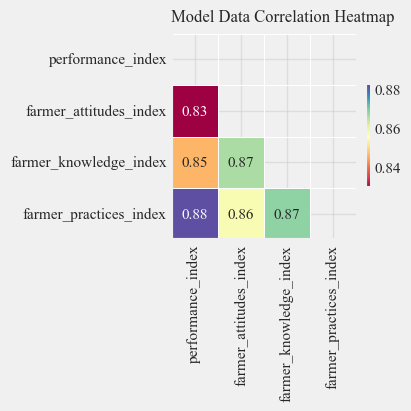

In [315]:
reduced_data = pd.concat([farmer_demg['performance_index'], farmer_attitudes['farmer_attitudes_index'], farmer_knowledge['farmer_knowledge_index'], farmer_practices['farmer_practices_index']], axis=1)

reduced_corr = reduced_data.corr()
reduced_mask = np.triu(np.ones_like(reduced_corr, dtype=bool))

display(reduced_corr.round(2 ))

fig, ax = plt.subplots(figsize=(4, 4))

sns.heatmap(reduced_corr, mask=reduced_mask, cmap='Spectral', cbar=True, linewidths=0.5, cbar_kws={"shrink": 0.5}, annot=True, fmt='.2f', ax=ax)

ax.set_title('Model Data Correlation Heatmap', y=1.02, loc='left')

ax.set_xlabel('')
ax.set_ylabel('')

sns.despine()

plt.show()

# fa = FactorAnalyzer(rotation='varimax')
# 
# # Perform factor analysis on the farmer attitudes data
# fa.fit(farmer_attitudes.select_dtypes('number'))
# 
# # Get the factor loadings
# att_loadings = fa.loadings_
# 
# # Create a dataframe of the factor loadings
# att_loadings_df = pd.DataFrame(att_loadings, index=farmer_attitudes.select_dtypes('number').columns, columns=['Factor 1'])
# 
# # Get the factor variance
# att_var = fa.get_factor_variance()
# 
# # Create a dataframe of the factor variance
# att_var_df = pd.DataFrame(att_var, index=['SS Loadings', 'Proportion Var', 'Cumulative Var'], columns=['Factor 1'])
# 
# att_var_df

In [316]:
model_data = pd.concat([farmer_demg, reduced_data.iloc[:,1:]], axis=1)
model_data

,performance_index,age,monthly_income,vc_experience,ward_Mtito Andei,ward_Thange,ward_Tulimani,ward_Waia/Kako,value_chain_Green gram,value_chain_Indigenous chicken,value_chain_Mango,value_chain_Tomato,farmer_attitudes_index,farmer_knowledge_index,farmer_practices_index
0,-1.830068,64,30000,40,False,False,True,False,False,False,False,True,-3.001571,-1.668281,-2.078693
1,-2.502048,67,20000,20,False,False,True,False,False,False,False,True,-3.117578,-2.593279,-2.239666
2,-2.502048,33,5000,5,False,False,True,False,False,False,False,True,-3.117578,-2.593279,-2.239666
3,-1.830068,73,800,2,False,False,True,False,False,False,False,True,-3.001571,-2.451194,-2.078693
4,-2.502048,71,10000,5,False,False,True,False,False,False,False,True,-3.117578,-2.593279,-2.560161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,1.831304,85,16000,18,True,False,False,False,False,True,False,False,2.816756,1.445506,2.553227
331,1.831304,54,14000,15,True,False,False,False,False,True,False,False,2.172189,1.445506,2.112653
332,1.831304,60,16000,20,True,False,False,False,False,True,False,False,2.816756,2.083943,2.112653
333,-2.502048,62,4500,6,True,False,False,False,False,True,False,False,-3.117578,-2.593279,-2.560161


In [317]:
# Transform the data
scaler = StandardScaler()

# model_data_scaled = scaler.fit_transform(model_data)
# model_data_scaled_df = pd.DataFrame(model_data_scaled, columns=model_data.columns)

model_data_scaled = scaler.fit_transform(model_data.drop('performance_index', axis=1)) 
model_data_scaled_df = pd.DataFrame(model_data_scaled, columns=model_data.drop('performance_index', axis=1).columns)

model_data_scaled_df['performance_index'] = model_data['performance_index']

# Find the smallest value in the df; save its absolute value + 1 as a constant
const = abs(model_data_scaled_df.min().min()) + 1
model_data_scaled_df = model_data_scaled_df + const
 
# Apply the Box-Cox transformation to the data
for col in model_data_scaled_df.columns:
    # if model_data_scaled_df[col].min() < 0:
    #     const_ = abs(model_data_scaled_df[col].min()) + 1
    #     model_data_scaled_df[col] = model_data_scaled_df[col] + const_
    
    model_data[col], ld = boxcox(model_data_scaled_df[col])
    # model_data[col] = np.log(model_data_scaled_df[col])
    # model_data[col] = np.sqrt(model_data_scaled_df[col])
    # model_data[col] = np.cbrt(model_data_scaled_df[col])
    # model_data[col] = model_data_scaled_df[col] ** 2
    # model_data[col] = model_data_scaled_df[col] ** 3    
    # model_data_scaled_df[col] = model_data_scaled_df[col]
    print(f"Lambda for {col}: {ld:.2f}")

# Add the performance index column
# model_data_scaled_df['performance_index'] = model_data['performance_index']

model_data = model_data_scaled_df
model_data

Lambda for age: 1.00
Lambda for monthly_income: -2.30
Lambda for vc_experience: -3.29
Lambda for ward_Mtito Andei: -3.03
Lambda for ward_Thange: -6.84
Lambda for ward_Tulimani: -8.92
Lambda for ward_Waia/Kako: -6.84
Lambda for value_chain_Green gram: -8.53
Lambda for value_chain_Indigenous chicken: -0.40
Lambda for value_chain_Mango: -8.79
Lambda for value_chain_Tomato: -9.94
Lambda for farmer_attitudes_index: 0.83
Lambda for farmer_knowledge_index: 0.98
Lambda for farmer_practices_index: 0.84
Lambda for performance_index: 0.59


,age,monthly_income,vc_experience,ward_Mtito Andei,ward_Thange,ward_Tulimani,ward_Waia/Kako,value_chain_Green gram,value_chain_Indigenous chicken,value_chain_Mango,value_chain_Tomato,farmer_attitudes_index,farmer_knowledge_index,farmer_practices_index,performance_index
0,4.364108,5.310062,8.301985,2.745232,2.955743,5.664909,2.955743,3.025491,2.540129,3.034949,5.834923,2.261394,2.673913,2.380874,1.671980
1,4.584110,4.385134,5.335508,2.745232,2.955743,5.664909,2.955743,3.025491,2.540129,3.034949,5.834923,2.213445,2.214744,2.294051,1.000000
2,2.090748,2.997741,3.110650,2.745232,2.955743,5.664909,2.955743,3.025491,2.540129,3.034949,5.834923,2.213445,2.214744,2.294051,1.000000
3,5.024116,2.609271,2.665679,2.745232,2.955743,5.664909,2.955743,3.025491,2.540129,3.034949,5.834923,2.261394,2.285274,2.380874,1.671980
4,4.877447,3.460205,3.110650,2.745232,2.955743,5.664909,2.955743,3.025491,2.540129,3.034949,5.834923,2.213445,2.214744,2.121187,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,5.904126,4.015162,5.038860,4.823374,2.955743,3.039697,2.955743,3.025491,4.541637,3.034949,3.073392,4.666311,4.219597,4.879169,5.333352
331,3.630766,3.830177,4.593889,4.823374,2.955743,3.039697,2.955743,3.025491,4.541637,3.034949,3.073392,4.399889,4.219597,4.641539,5.333352
332,4.070771,4.015162,5.335508,4.823374,2.955743,3.039697,2.955743,3.025491,4.541637,3.034949,3.073392,4.666311,4.536518,4.641539,5.333352
333,4.217439,2.951495,3.258974,4.823374,2.955743,3.039697,2.955743,3.025491,4.541637,3.034949,3.073392,2.213445,2.214744,2.121187,1.000000


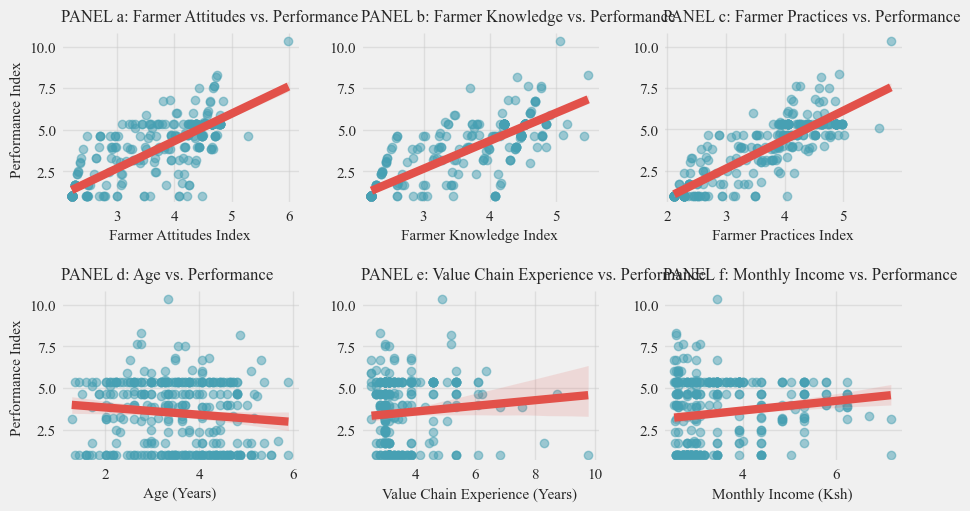

In [318]:
fig, ax = plt.subplots(2,3, figsize=(9, 5), gridspec_kw={'hspace': 0.1, 'wspace': 0.1})

sns.regplot(data=model_data, x='farmer_attitudes_index', y='performance_index', color=palette[0], line_kws={'color':palette[-1]}, scatter_kws={'alpha': 0.5}, ax=ax[0,0])
sns.regplot(data=model_data, x='farmer_knowledge_index', y='performance_index', color=palette[0], line_kws={'color':palette[-1]}, scatter_kws={'alpha': 0.5}, ax=ax[0,1])
sns.regplot(data=model_data, x='farmer_practices_index', y='performance_index', color=palette[0], line_kws={'color':palette[-1]}, scatter_kws={'alpha': 0.5}, ax=ax[0,2])
sns.regplot(data=model_data, x='age', y='performance_index', color=palette[0], line_kws={'color':palette[-1]}, scatter_kws={'alpha': 0.5}, ax=ax[1,0])
sns.regplot(data=model_data, x='vc_experience', y='performance_index', color=palette[0], line_kws={'color':palette[-1]}, scatter_kws={'alpha': 0.5}, ax=ax[1,1])
sns.regplot(data=model_data, x='monthly_income', y='performance_index', color=palette[0], line_kws={'color':palette[-1]}, scatter_kws={'alpha': 0.5}, ax=ax[1,2])

ax[0,0].set_title('PANEL a: Farmer Attitudes vs. Performance', y=1.02, loc='left')
ax[0,1].set_title('PANEL b: Farmer Knowledge vs. Performance', y=1.02, loc='left')
ax[0,2].set_title('PANEL c: Farmer Practices vs. Performance', y=1.02, loc='left')
ax[1,0].set_title('PANEL d: Age vs. Performance', y=1.02, loc='left')
ax[1,1].set_title('PANEL e: Value Chain Experience vs. Performance', y=1.02, loc='left')
ax[1,2].set_title('PANEL f: Monthly Income vs. Performance', y=1.02, loc='left')

ax[0,0].set_xlabel('Farmer Attitudes Index')
ax[0,1].set_xlabel('Farmer Knowledge Index')
ax[0,2].set_xlabel('Farmer Practices Index')
ax[1,0].set_xlabel('Age (Years)')
ax[1,1].set_xlabel('Value Chain Experience (Years)')
ax[1,2].set_xlabel('Monthly Income (Ksh)')

ax[0,0].set_ylabel('Performance Index')
ax[0,1].set_ylabel('')
ax[0,2].set_ylabel('')
ax[1,0].set_ylabel('Performance Index')
ax[1,1].set_ylabel('')
ax[1,2].set_ylabel('')

sns.despine()

plt.show()

# fig, ax = plt.subplots(2,4, figsize=(12, 8), gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
# 
# sns.regplot(data=model_data, y='value_chain_Green gram', x='performance_index', line_kws={'color':'red'}, scatter_kws={'alpha': 0.5}, ax=ax[0,0], logistic=True)
# sns.regplot(data=model_data, y='value_chain_Indigenous chicken', x='performance_index', line_kws={'color':'red'}, scatter_kws={'alpha': 0.5}, ax=ax[0,1], logistic=True)
# sns.regplot(data=model_data, y='value_chain_Mango', x='performance_index', line_kws={'color':'red'}, scatter_kws={'alpha': 0.5}, ax=ax[0,2], logistic=True)
# sns.regplot(data=model_data, y='value_chain_Tomato', x='performance_index', line_kws={'color':'red'}, scatter_kws={'alpha': 0.5}, ax=ax[0,3], logistic=True)
# sns.regplot(data=model_data, y='ward_Mtito Andei', x='performance_index', line_kws={'color':'red'}, scatter_kws={'alpha': 0.5}, ax=ax[1,0], logistic=True)
# sns.regplot(data=model_data, y='ward_Thange', x='performance_index', line_kws={'color':'red'}, scatter_kws={'alpha': 0.5}, ax=ax[1,1], logistic=True)
# sns.regplot(data=model_data, y='ward_Tulimani', x='performance_index', line_kws={'color':'red'}, scatter_kws={'alpha': 0.5}, ax=ax[1,2], logistic=True)
# sns.regplot(data=model_data, y='ward_Waia/Kako', x='performance_index', line_kws={'color':'red'}, scatter_kws={'alpha': 0.5}, ax=ax[1,3], logistic=True)
# 
# ax[0,0].set_title('PANEL a: Green Gram vs. Performance', y=1.02, loc='left')
# ax[0,1].set_title('PANEL b: Indigenous Chicken vs. Performance', y=1.02, loc='left')
# ax[0,2].set_title('PANEL c: Mango vs. Performance', y=1.02, loc='left')
# ax[0,3].set_title('PANEL d: Tomato vs. Performance', y=1.02, loc='left')
# ax[1,0].set_title('PANEL e: Mtito Andei vs. Performance', y=1.02, loc='left')
# ax[1,1].set_title('PANEL f: Thange vs. Performance', y=1.02, loc='left')
# ax[1,2].set_title('PANEL g: Tulimani vs. Performance', y=1.02, loc='left')
# ax[1,3].set_title('PANEL h: Waia/Kako vs. Performance', y=1.02, loc='left')
# 
# ax[0,0].set_xlabel('Green Gram')
# ax[0,1].set_xlabel('Indigenous Chicken')
# ax[0,2].set_xlabel('Mango')
# ax[0,3].set_xlabel('Tomato')
# ax[1,0].set_xlabel('Mtito Andei')
# ax[1,1].set_xlabel('Thange')
# ax[1,2].set_xlabel('Tulimani')
# ax[1,3].set_xlabel('Waia/Kako')
# 
# ax[0,0].set_ylabel('Performance Index')
# ax[0,1].set_ylabel('')
# ax[0,2].set_ylabel('')
# ax[0,3].set_ylabel('')
# ax[1,0].set_ylabel('Performance Index')
# ax[1,1].set_ylabel('')
# ax[1,2].set_ylabel('')
# ax[1,3].set_ylabel('')
# 
# sns.despine()
# 
# plt.show()

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1766: UserWarning: The figure layout has changed to tight
  f.tight_layout()
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1766: UserWarning: The figure layout has changed to tight
  f.tight_layout()
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1766: UserWarning: The figure layout has changed to tight
  f.tight_layout()


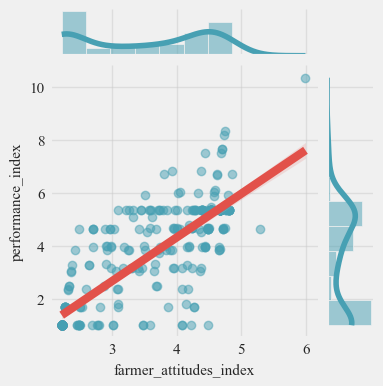

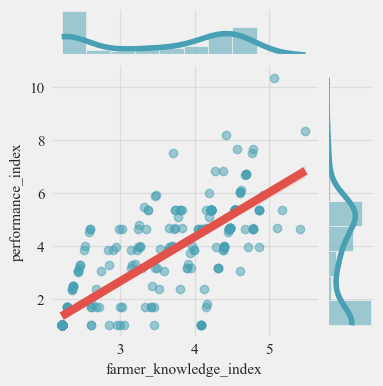

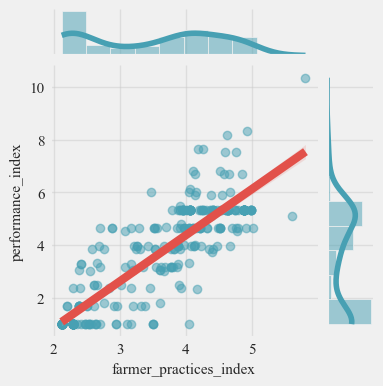

In [319]:
# Make sure adjust the size
sns.jointplot(data=model_data, x='farmer_attitudes_index', y='performance_index', kind='reg', color=palette[0], line_kws={'color':palette[-1]}, scatter_kws={'alpha': 0.5}, height=4)
sns.jointplot(data=model_data, x='farmer_knowledge_index', y='performance_index', kind='reg', color=palette[0], line_kws={'color':palette[-1]}, scatter_kws={'alpha': 0.5}, height=4)
sns.jointplot(data=model_data, x='farmer_practices_index', y='performance_index', kind='reg', color=palette[0], line_kws={'color':palette[-1]}, scatter_kws={'alpha': 0.5}, height=4)


plt.show()


In [320]:
X4 = model_data[['farmer_attitudes_index', 'farmer_knowledge_index', 'farmer_practices_index']]
X1 = model_data[['farmer_attitudes_index']]
X2 = model_data[['farmer_knowledge_index']]
X3 = model_data[['farmer_practices_index']]
X5 = model_data[['age', 'vc_experience', 'monthly_income']]
y = model_data['performance_index']

X1 = sm.add_constant(X1)
X2 = sm.add_constant(X2)
X3 = sm.add_constant(X3)
X4 = sm.add_constant(X4)
X5 = sm.add_constant(X5)

model1 = sm.OLS(y, X1).fit()
model2 = sm.OLS(y, X2).fit()
model3 = sm.OLS(y, X3).fit()
model4 = sm.OLS(y, X4).fit()
model5 = sm.OLS(y, X5).fit()

print(model1.summary())
print(model2.summary())
print(model3.summary())
print(model4.summary())
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:      performance_index   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     733.4
Date:                Fri, 02 Feb 2024   Prob (F-statistic):           3.62e-86
Time:                        08:49:27   Log-Likelihood:                -510.17
No. Observations:                 335   AIC:                             1024.
Df Residuals:                     333   BIC:                             1032.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2

In [321]:
# Econometric Tests

# Normality
statistic_nt1, p_value_nt1 = shapiro(model1.resid)
statistic_nt2, p_value_nt2 = shapiro(model2.resid)
statistic_nt3, p_value_nt3 = shapiro(model3.resid)
statistic_nt4, p_value_nt4 = shapiro(model4.resid)
statistic_nt5, p_value_nt5 = shapiro(model5.resid)

print(f"Shapiro-Wilk Test for Normality (Model 1): Statistic = {statistic_nt1:.4f}, p-value = {p_value_nt1:.4f}")
print(f"Shapiro-Wilk Test for Normality (Model 2): Statistic = {statistic_nt2:.4f}, p-value = {p_value_nt2:.4f}")
print(f"Shapiro-Wilk Test for Normality (Model 3): Statistic = {statistic_nt3:.4f}, p-value = {p_value_nt3:.4f}")
print(f"Shapiro-Wilk Test for Normality (Model 4): Statistic = {statistic_nt4:.4f}, p-value = {p_value_nt4:.4f}")
print(f"Shapiro-Wilk Test for Normality (Model 5): Statistic = {statistic_nt5:.4f}, p-value = {p_value_nt5:.4f}")

# Homoscedasticity
statistic_ht1, p_value_ht1, f_statistic_ht1, f_p_value_ht1 = het_breuschpagan(model1.resid, model1.model.exog)
statistic_ht2, p_value_ht2, f_statistic_ht2, f_p_value_ht2 = het_breuschpagan(model2.resid, model2.model.exog)
statistic_ht3, p_value_ht3, f_statistic_ht3, f_p_value_ht3 = het_breuschpagan(model3.resid, model3.model.exog)
statistic_ht4, p_value_ht4, f_statistic_ht4, f_p_value_ht4 = het_breuschpagan(model4.resid, model4.model.exog)
statistic_ht5, p_value_ht5, f_statistic_ht5, f_p_value_ht5 = het_breuschpagan(model5.resid, model5.model.exog)

print(f"Breusch-Pagan Test for Homoscedasticity (Model 1): Statistic = {statistic_ht1:.4f}, p-value = {p_value_ht1:.4f}, F-Statistic = {f_statistic_ht1:.4f}, F p-value = {f_p_value_ht1:.4f}")
print(f"Breusch-Pagan Test for Homoscedasticity (Model 2): Statistic = {statistic_ht2:.4f}, p-value = {p_value_ht2:.4f}, F-Statistic = {f_statistic_ht2:.4f}, F p-value = {f_p_value_ht2:.4f}")
print(f"Breusch-Pagan Test for Homoscedasticity (Model 3): Statistic = {statistic_ht3:.4f}, p-value = {p_value_ht3:.4f}, F-Statistic = {f_statistic_ht3:.4f}, F p-value = {f_p_value_ht3:.4f}")
print(f"Breusch-Pagan Test for Homoscedasticity (Model 4): Statistic = {statistic_ht4:.4f}, p-value = {p_value_ht4:.4f}, F-Statistic = {f_statistic_ht4:.4f}, F p-value = {f_p_value_ht4:.4f}")
print(f"Breusch-Pagan Test for Homoscedasticity (Model 5): Statistic = {statistic_ht5:.4f}, p-value = {p_value_ht5:.4f}, F-Statistic = {f_statistic_ht5:.4f}, F p-value = {f_p_value_ht5:.4f}")

# Multicollinearity
vif1 = pd.DataFrame()
vif1['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif1['feature'] = X1.columns
vif1 = vif1.round(2)
display(vif1)

vif2 = pd.DataFrame()
vif2['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif2['feature'] = X2.columns
vif2 = vif2.round(2)
display(vif2)

vif3 = pd.DataFrame()
vif3['VIF'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif3['feature'] = X3.columns
vif3 = vif3.round(2)
display(vif3)

vif4 = pd.DataFrame()
vif4['VIF'] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]
vif4['feature'] = X4.columns
vif4 = vif4.round(2)
display(vif4)

vif5 = pd.DataFrame()
vif5['VIF'] = [variance_inflation_factor(X5.values, i) for i in range(X5.shape[1])]
vif5['feature'] = X5.columns
vif5 = vif5.round(2)
display(vif5)

Shapiro-Wilk Test for Normality (Model 1): Statistic = 0.9313, p-value = 0.0000
Shapiro-Wilk Test for Normality (Model 2): Statistic = 0.9331, p-value = 0.0000
Shapiro-Wilk Test for Normality (Model 3): Statistic = 0.9607, p-value = 0.0000
Shapiro-Wilk Test for Normality (Model 4): Statistic = 0.9526, p-value = 0.0000
Shapiro-Wilk Test for Normality (Model 5): Statistic = 0.9449, p-value = 0.0000
Breusch-Pagan Test for Homoscedasticity (Model 1): Statistic = 5.6265, p-value = 0.0177, F-Statistic = 5.6884, F p-value = 0.0176
Breusch-Pagan Test for Homoscedasticity (Model 2): Statistic = 6.4758, p-value = 0.0109, F-Statistic = 6.5640, F p-value = 0.0108
Breusch-Pagan Test for Homoscedasticity (Model 3): Statistic = 10.2826, p-value = 0.0013, F-Statistic = 10.5449, F p-value = 0.0013
Breusch-Pagan Test for Homoscedasticity (Model 4): Statistic = 16.5027, p-value = 0.0009, F-Statistic = 5.7168, F p-value = 0.0008
Breusch-Pagan Test for Homoscedasticity (Model 5): Statistic = 26.2303, p-val

,VIF,feature
0,13.26,const
1,1.00,farmer_attitudes_index


,VIF,feature
0,13.26,const
1,1.00,farmer_knowledge_index


,VIF,feature
0,13.26,const
1,1.00,farmer_practices_index


,VIF,feature
0,14.49,const
1,4.89,farmer_attitudes_index
2,5.26,farmer_knowledge_index
3,4.96,farmer_practices_index


,VIF,feature
0,41.11,const
1,1.09,age
2,1.08,vc_experience
3,1.05,monthly_income


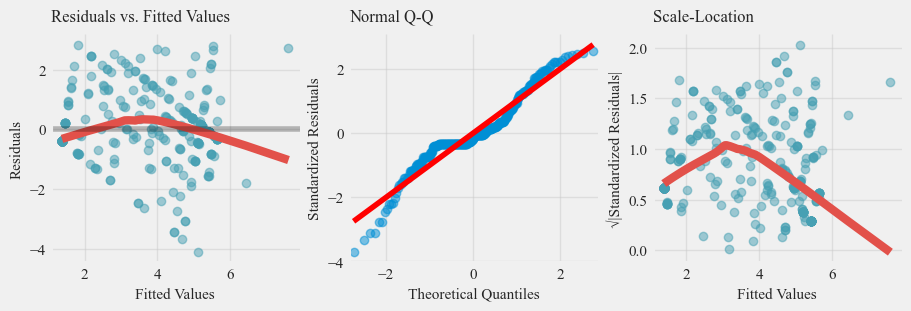

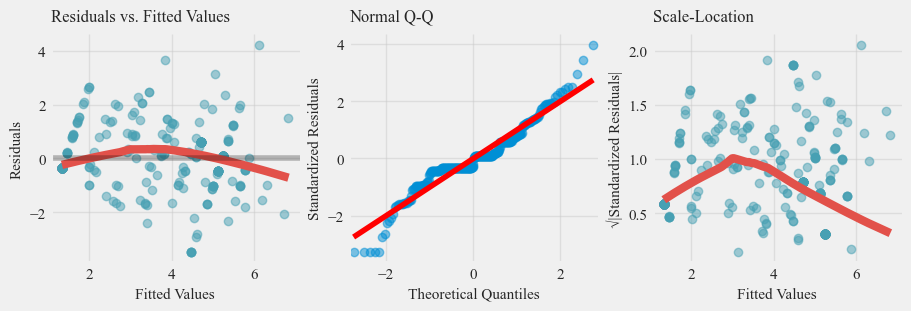

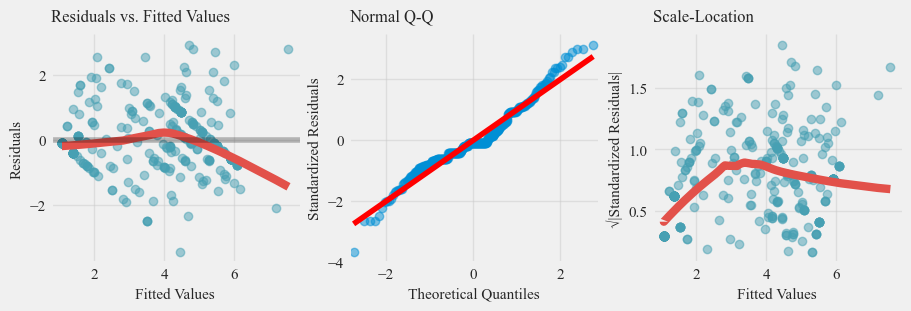

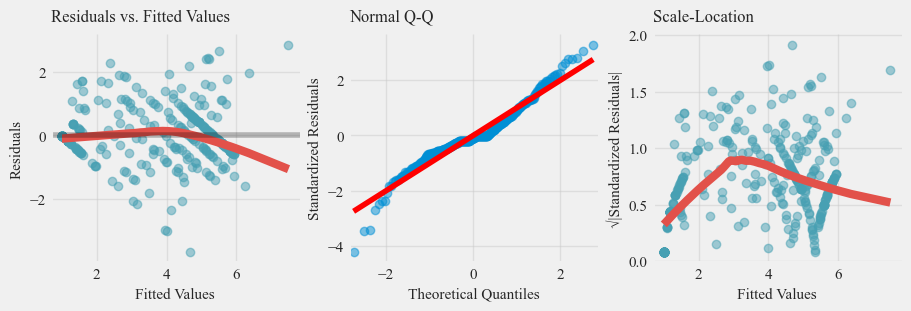

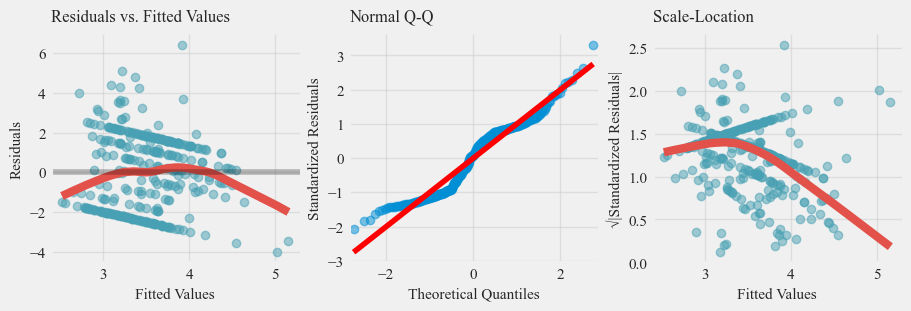

In [322]:
# plot the residuals for each model

def plot_residuals(model):
    fig, ax = plt.subplots(1, 3, figsize=(9, 3))
    
    sns.regplot(x=model.fittedvalues, y=model.resid, color=palette[0], lowess=True, line_kws={'color':palette[-1]}, scatter_kws={'alpha': 0.5}, ax=ax[0])
    sm.qqplot(model.resid, line='s', fit=True, ax=ax[1], alpha=0.5)
    sns.regplot(x=model.fittedvalues, y=np.sqrt(np.abs(model.resid)), color=palette[0], lowess=True, line_kws={'color':palette[-1]}, scatter_kws={'alpha': 0.5}, ax=ax[2])

    ax[0].axhline(y=0, color='black', alpha=0.25)
    
    ax[0].set_title('Residuals vs. Fitted Values', y=1.02, loc='left')
    ax[1].set_title('Normal Q-Q', y=1.02, loc='left')
    ax[2].set_title('Scale-Location', y=1.02, loc='left')
    
    ax[0].set_xlabel('Fitted Values')
    ax[1].set_xlabel('Theoretical Quantiles')
    ax[2].set_xlabel('Fitted Values')
    
    ax[0].set_ylabel('Residuals')
    ax[1].set_ylabel('Standardized Residuals')
    ax[2].set_ylabel('√|Standardized Residuals|')
    
    sns.despine()
    
    plt.show()
    
plot_residuals(model1)
plot_residuals(model2)
plot_residuals(model3)
plot_residuals(model4)
plot_residuals(model5)

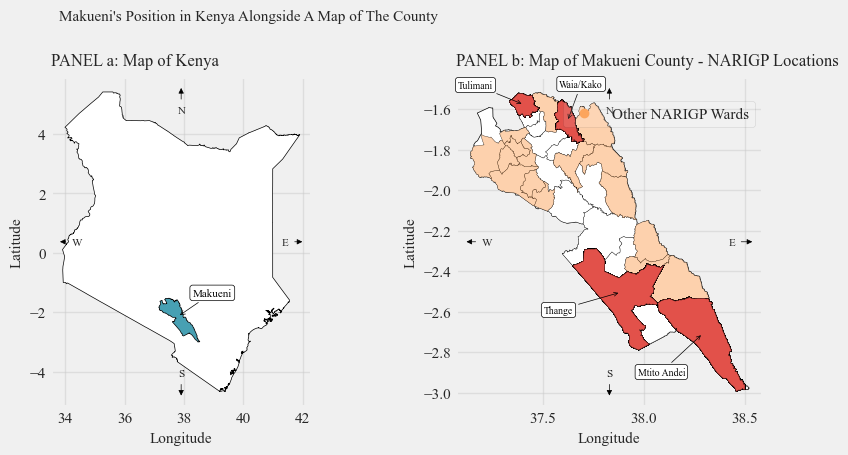

In [323]:
# Create a single figure
fig, ax = plt.subplots(1,2, figsize=(8, 4), gridspec_kw={'wspace': 0.1})

# Plot Kenya
kenya.plot(ax=ax[0], color='white', edgecolor='black', linewidth=0.5)
ax[0].set_title('PANEL a: Map of Kenya', y=1.01, loc='left')  # Set title alignment to left

# Plot Makueni County
makueni_county.plot(ax=ax[0], color=palette[0], edgecolor='black')

# Annotate Makueni County
centroid = makueni_county.iloc[0].geometry.centroid
annotation = ax[0].annotate('Makueni', xy=(centroid.x, centroid.y), xytext=(25, 15),
                            textcoords="offset points", color='black', fontsize=8, ha='center',
                            bbox=dict(boxstyle='round', fc='white', ec='black', pad=0.25),
                            arrowprops=dict(arrowstyle='->', color='black'))

# Plot Makueni County separately
makueni_county.plot(ax=ax[1], color='white', edgecolor='black', linewidth=0.5)
ax[1].set_title('PANEL b: Map of Makueni County - NARIGP Locations', y=1.01, loc='left')  # Set title alignment to left

# Plot Makueni wards
makueni_wards.plot(ax=ax[1], color='white', edgecolor='black', linewidth=0.25)
narig_wards.plot(ax=ax[1], color=palette[-2], edgecolor='black', linewidth = 0.1, alpha=0.5)

# Annotate Makueni County in the second plot
# annotation2 = ax[1].annotate('Makueni', xy=(makueni_county.geometry.centroid.x, makueni_county.geometry.centroid.y),
#xytext=(30, 0), textcoords="offset points", color='black', fontsize=8, ha='center')

# Plot survey points
# Set colors for each ward

# palette = sns.color_palette('Blues', 5)
# palette.reverse()

# Update palette
colors = {'Tulimani': palette[-1],
          'Waia/Kako': palette[-1],
          'Mtito Andei': palette[-1],
          'Thange': palette[-1]}

survey.plot(ax=ax[1], edgecolor='black', linewidth=0.25, color=survey['ward'].map(colors), legend=True)

# Plot Makueni Sub Counties
# makueni_sub_counties.plot(ax=ax[1], edgecolor='black', linewidth=0.75)

# Add gray to the legend indicating NARIG locations
handles, labels = ax[1].get_legend_handles_labels()
# handles.append(plt.Line2D([], [], color='#909CC2', marker='o', linestyle='None'))
# labels.append('Tulimani')
# handles.append(plt.Line2D([], [], color='#084887', marker='o', linestyle='None'))
# labels.append('Waia/Kako')
# handles.append(plt.Line2D([], [], color='#F58A07', marker='o', linestyle='None'))
# labels.append('Mtito Andei')
# handles.append(plt.Line2D([], [], color='#F9AB55', marker='o', linestyle='None'))
# labels.append('Thange')
handles.append(plt.Line2D([], [], color=palette[-2], marker='o', linestyle='None'))
labels.append('Other NARIGP Wards')
ax[1].legend(handles=handles, labels=labels, loc='upper right', ncol=1, bbox_to_anchor=(1, 0.95), facecolor='white', edgecolor='black', framealpha=0.1)

# palette = sns.color_palette('Blues', 5)
# palette.reverse()
# 
# # Update palette
# ax[1].get_legend().get_texts()[0].set_color(palette[0])
# ax[1].get_legend().get_texts()[1].set_color(palette[1])
# ax[1].get_legend().get_texts()[2].set_color(palette[2])
# ax[1].get_legend().get_texts()[3].set_color(palette[3])
# ax[1].get_legend().get_texts()[4].set_color(palette[4])


# Add titles and labels
fig.suptitle("Makueni's Position in Kenya Alongside A Map of The County", x=0.08, y=1.1, ha='left')  # Set title alignment to left
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')

# Get unique geometries from the dataframe
unique_geometries = narig_dfs['survey_df'].drop_duplicates(subset='geometry')

# Add annotations individually
tulimani = unique_geometries[unique_geometries['ward'] == 'Tulimani']
tulimani_centroid = tulimani.iloc[0].geometry.centroid
ax[1].annotate('Tulimani', xy=(tulimani_centroid.x, tulimani_centroid.y),
            xytext=(-35, 12), textcoords="offset points", color='black', fontsize=7, ha='center',
            bbox=dict(boxstyle='round', fc='white', ec='black', pad=0.25),
            arrowprops=dict(arrowstyle='->', color='black'))

kako = unique_geometries[unique_geometries['ward'] == 'Waia/Kako']
kako_centroid = kako.iloc[0].geometry.centroid
ax[1].annotate('Waia/Kako', xy=(kako_centroid.x, kako_centroid.y),
            xytext=(10, 25), textcoords="offset points", color='black', fontsize=7, ha='center',
            bbox=dict(boxstyle='round', fc='white', ec='black', pad=0.25),
            arrowprops=dict(arrowstyle='->', color='black'))

mtito = unique_geometries[unique_geometries['ward'] == 'Mtito Andei']
mtito_centroid = mtito.iloc[0].geometry.centroid
ax[1].annotate('Mtito Andei', xy=(mtito_centroid.x, mtito_centroid.y),
            xytext=(-30, -30), textcoords="offset points", color='black', fontsize=7, ha='center',
            bbox=dict(boxstyle='round', fc='white', ec='black', pad=0.25),
            arrowprops=dict(arrowstyle='->', color='black'))

thange = unique_geometries[unique_geometries['ward'] == 'Thange']
thange_centroid = thange.iloc[0].geometry.centroid
ax[1].annotate('Thange', xy=(thange_centroid.x, thange_centroid.y),
            xytext=(-45, -15), textcoords="offset points", color='black', fontsize=7, ha='center',
            bbox=dict(boxstyle='round', fc='white', ec='black', pad=0.25),
            arrowprops=dict(arrowstyle='->', color='black'))

## Remove axes
# ax[0].set_axis_off()
# ax[1].set_axis_off()

# Add a compass rose
ax[0].annotate('N', xy=(0.5, 0.975), xytext=(0.5, 0.90), xycoords='axes fraction', ha='center', va='center', fontsize=8, arrowprops=dict(arrowstyle='-|>, widthB=1.5, lengthB=0.75', color='black'))
ax[0].annotate('S', xy=(0.5, 0.025), xytext=(0.5, 0.10), xycoords='axes fraction', ha='center', va='center', fontsize=8, arrowprops=dict(arrowstyle='-|>, widthB=1.5, lengthB=0.75', color='black'))
ax[0].annotate('E', xy=(0.975, 0.5), xytext=(0.90, 0.5), xycoords='axes fraction', ha='center', va='center', fontsize=8, arrowprops=dict(arrowstyle='-|>, widthB=1.5, lengthB=0.75', color='black'))
ax[0].annotate('W', xy=(0.025, 0.5), xytext=(0.10, 0.5), xycoords='axes fraction', ha='center', va='center', fontsize=8, arrowprops=dict(arrowstyle='-|>, widthB=1.5, lengthB=0.75', color='black'))

ax[1].annotate('N', xy=(0.5, 0.975), xytext=(0.5, 0.90), xycoords='axes fraction', ha='center', va='center', fontsize=8, arrowprops=dict(arrowstyle='-|>, widthB=1.5, lengthB=0.75', color='black'))
ax[1].annotate('S', xy=(0.5, 0.025), xytext=(0.5, 0.10), xycoords='axes fraction', ha='center', va='center', fontsize=8, arrowprops=dict(arrowstyle='-|>, widthB=1.5, lengthB=0.75', color='black'))
ax[1].annotate('E', xy=(0.975, 0.5), xytext=(0.90, 0.5), xycoords='axes fraction', ha='center', va='center', fontsize=8, arrowprops=dict(arrowstyle='-|>, widthB=1.5, lengthB=0.75', color='black'))
ax[1].annotate('W', xy=(0.025, 0.5), xytext=(0.10, 0.5), xycoords='axes fraction', ha='center', va='center', fontsize=8, arrowprops=dict(arrowstyle='-|>, widthB=1.5, lengthB=0.75', color='black'))
# Add a border to the figure
# fig.patch.set_edgecolor('black')
# ax[0].spines['top'].set_visible(False)
# ax[0].spines['right'].set_visible(False)
# ax[1].spines['top'].set_visible(False)
# ax[1].spines['right'].set_visible(False)

plt.show()

NameError: name 'df_outliers' is not defined

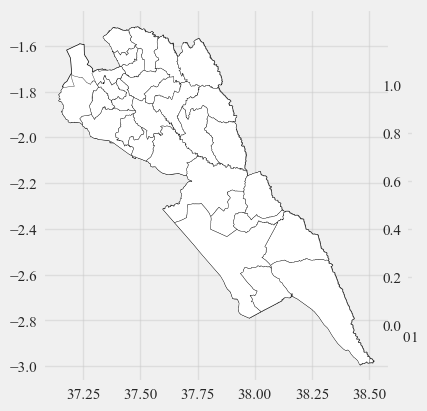

In [324]:
# Plot project_performance on the map
fig, ax = plt.subplots(figsize=(4, 4))

makueni_county.plot(ax=ax, color='white', edgecolor='black', linewidth=0.5)
makueni_wards.plot(ax=ax, color='white', edgecolor='black', linewidth=0.25)
cax = fig.add_axes([1, 0.2, 0.02, 0.6])  # Reduce the width of the colorbar axes
df_outliers.plot('project_performance', legend=True, ax=ax, cax=cax)  # Add cax parameter to specify the colorbar axes

# Add title and labels
ax.set_title('Project Performance Across NARIG Wards', y=1.01, loc='left')  # Set title alignment to left

# Get unique geometries from the dataframe
unique_geometries = df_outliers.drop_duplicates(subset='geometry')

# Add annotations individually
tulimani = unique_geometries[unique_geometries['ward'] == 'Tulimani']
tulimani_centroid = tulimani.iloc[0].geometry.centroid
ax.annotate('Tulimani', xy=(tulimani_centroid.x, tulimani_centroid.y),
            xytext=(-35, 12), textcoords="offset points", color='black', fontsize=7, ha='center',
            bbox=dict(boxstyle='round', fc='white', ec='black', pad=0.25),
            arrowprops=dict(arrowstyle='->', color='black'))

kako = unique_geometries[unique_geometries['ward'] == 'Waia/Kako']
kako_centroid = kako.iloc[0].geometry.centroid
ax.annotate('Waia/Kako', xy=(kako_centroid.x, kako_centroid.y),
            xytext=(10, 25), textcoords="offset points", color='black', fontsize=7, ha='center',
            bbox=dict(boxstyle='round', fc='white', ec='black', pad=0.25),
            arrowprops=dict(arrowstyle='->', color='black'))

mtito = unique_geometries[unique_geometries['ward'] == 'Mtito Andei']
mtito_centroid = mtito.iloc[0].geometry.centroid
ax.annotate('Mtito Andei', xy=(mtito_centroid.x, mtito_centroid.y),
            xytext=(-30, -30), textcoords="offset points", color='black', fontsize=7, ha='center',
            bbox=dict(boxstyle='round', fc='white', ec='black', pad=0.25),
            arrowprops=dict(arrowstyle='->', color='black'))

thange = unique_geometries[unique_geometries['ward'] == 'Thange']
thange_centroid = thange.iloc[0].geometry.centroid
ax.annotate('Thange', xy=(thange_centroid.x, thange_centroid.y),
            xytext=(-45, -15), textcoords="offset points", color='black', fontsize=7, ha='center',
            bbox=dict(boxstyle='round', fc='white', ec='black', pad=0.25),
            arrowprops=dict(arrowstyle='->', color='black'))

ax.annotate('N', xy=(0.5, 0.975), xytext=(0.5, 0.90), xycoords='axes fraction', ha='center', va='center', fontsize=8, arrowprops=dict(arrowstyle='-|>, widthB=1.5, lengthB=0.75', color='black'))
ax.annotate('S', xy=(0.5, 0.025), xytext=(0.5, 0.10), xycoords='axes fraction', ha='center', va='center', fontsize=8, arrowprops=dict(arrowstyle='-|>, widthB=1.5, lengthB=0.75', color='black'))
ax.annotate('E', xy=(0.975, 0.5), xytext=(0.90, 0.5), xycoords='axes fraction', ha='center', va='center', fontsize=8, arrowprops=dict(arrowstyle='-|>, widthB=1.5, lengthB=0.75', color='black'))
ax.annotate('W', xy=(0.025, 0.5), xytext=(0.10, 0.5), xycoords='axes fraction', ha='center', va='center', fontsize=8, arrowprops=dict(arrowstyle='-|>, widthB=1.5, lengthB=0.75', color='black'))

# Remove axes
# ax.set_axis_off()
# Top and right spines should be off
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

plt.show()

In [ ]:
# Create a figure with boxplots for demographic data against project_performance
# fig, ax = plt.subplots(2, 2, figsize=(9, 6), sharey=True)
# 
# sns.boxplot(data=df_outliers, x='value_chain', y='project_performance', width=0.25, ax=ax[0,0])
# sns.boxplot(data=df_outliers, x='education', y='project_performance', width=0.25, ax=ax[0,1])
# sns.boxplot(data=df_outliers, x='gender', y='project_performance', width=0.1, ax=ax[1,0])
# sns.boxplot(data=df_outliers, x='family_head', y='project_performance', width=0.1, ax=ax[1,1])
# 
# ax[0,0].set_title('Value Chain vs Project Performance', y=1.02, loc='left')
# ax[0,1].set_title('Education vs Project Performance', y=1.02, loc='left')
# ax